# gluonts12-end_dates (monthly, deepar)

In [1]:
!pip install mxnet=="1.4.1"

    100% |████████████████████████████████| 28.4MB 1.8MB/s  eta 0:00:01
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
!pip install gluonts

    100% |████████████████████████████████| 327kB 50.7MB/s ta 0:00:01
    100% |████████████████████████████████| 81kB 51.8MB/s ta 0:00:01
    100% |████████████████████████████████| 7.3MB 6.7MB/s  eta 0:00:01
    100% |████████████████████████████████| 194kB 59.0MB/s eta 0:00:01
    100% |████████████████████████████████| 10.4MB 4.6MB/s  eta 0:00:01
    100% |████████████████████████████████| 61kB 38.8MB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/41/17/c62faccbfbd163c7f57f3844689e3a78bae1f403648a6afb1d0866d87fbb/python_dateutil-2.8.0-py2.py3-none-any.whl
  Running setup.py bdist_wheel for holidays ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/40/a9/2b/94ac5464363d37564a87dc93a9d21a5850aac14a4608197003
  Running setup.py bdist_wheel for ujson ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/28/77/e4/0311145b9c2e2f01470e744855131f9e34d6919687550f87d1
Successfully built holidays ujson
  Found existing installation: python-dateut

In [1]:
import gluonts
print(gluonts.__version__)

import mxnet
print(mxnet.__version__)

# standard imports
import numpy as np
import pandas as pd

# Vis
%matplotlib inline
import matplotlib.pyplot as plt
from pprint import pprint

# mxnet
import mxnet as mx

# gluonts
from gluonts.dataset.util import to_pandas

# imports from utility function
import utils_gluonts10 as utils
from utils_gluonts10 import get_dataset, dataset_recipes
from utils_gluonts10_deepar import deepar

0.4.2
1.4.1


INFO:root:Using CPU


In [2]:
print(f"Available datasets: {list(dataset_recipes.keys())}")

Available datasets: ['m4_daily', 'm4_daily_domain', 'm4_daily_id', 'm4_hourly', 'm4_hourly_id', 'm4_monthly', 'm4_monthly_atm', 'm4_monthly_dates', 'm4_monthly_demographic', 'm4_monthly_domain', 'm4_monthly_end032014', 'm4_monthly_end052015', 'm4_monthly_end092007', 'm4_monthly_finance', 'm4_monthly_id', 'm4_monthly_industry', 'm4_monthly_macro', 'm4_monthly_micro', 'm4_monthly_micro_atm', 'm4_monthly_nonmicro_10975_seed42', 'm4_monthly_nonmicro_10975_seed43', 'm4_monthly_nonmicro_10975_seed44', 'm4_monthly_nonmicro_10975_seed45', 'm4_monthly_nonmicro_10975_seed46', 'm4_monthly_nonmicro_10975_seed47', 'm4_monthly_nonmicro_10975_seed48', 'm4_monthly_nonmicro_10975_seed49', 'm4_monthly_nonmicro_10975_seed50', 'm4_monthly_nonmicro_10975_seed51', 'm4_monthly_other', 'm4_quarterly', 'm4_quarterly_atm', 'm4_quarterly_dates', 'm4_quarterly_demographic', 'm4_quarterly_domain', 'm4_quarterly_end2003q3', 'm4_quarterly_end2013q1', 'm4_quarterly_end2015q1', 'm4_quarterly_finance', 'm4_quarterly_id

In [5]:
dataname = "m4_weekly"
dataset = utils.get_dataset(dataname, regenerate=False)

INFO:root:downloading and processing m4_weekly


saving time-series into /home/ec2-user/.mxnet/gluon-ts/datasets/m4_weekly/train/data.json
saving time-series into /home/ec2-user/.mxnet/gluon-ts/datasets/m4_weekly/test/data.json


In [6]:
dataname = "m4_monthly_end032014"
dataset = utils.get_dataset(dataname, regenerate=False)

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly_end032014.


In [7]:
# get the first time series in the training set
train_entry = next(iter(dataset.train))
test_entry = next(iter(dataset.test))

# check keys
print(train_entry.keys())
print(test_entry.keys())

# check length of the series
print("length train dataset", len(dataset.train))
print("length test dataset", len(dataset.train))


dict_keys(['start', 'item_id', 'target', 'feat_static_cat', 'source'])
dict_keys(['start', 'item_id', 'target', 'feat_static_cat', 'source'])
length train dataset 1807
length test dataset 1807


In [8]:
train_entry

{'start': Timestamp('1750-01-31 00:00:00', freq='M'),
 'item_id': 'M3991',
 'target': array([ 1499.,  1677.,  2533.,  1834.,  2922.,  2460.,  2892.,  1969.,
         2781.,  2988.,  3035.,  3172.,  1818.,  2828.,  1979.,  2821.,
         2181.,  2287.,  2320.,  2839.,  1482.,  3094.,  2410.,  2752.,
         1728.,  2112.,  1946.,  2738.,  1812.,  2142.,  2365.,  3492.,
         2875.,  3992.,  1805.,  3433.,  1287.,  2497.,  3733.,  3392.,
         3690.,  4116.,  3163.,  5815.,  4334.,  3794.,  5340.,  7929.,
        15301.,  5824.,  4470.,  7728.,  4461.,  5206.,  5083., 16296.,
         3479.,  3932.,  5383.,  3772.,  3110.,  3995.,  4393.,  5821.,
         5362.,  3344.,  4723.,  4053.,  4007.,  7126.,  3785.,  2627.,
         1963.,  3676.,  5577.,  3394.,  2389.,  1922.,  2924.,  3221.,
         3411.,  4006.,  3108.,  3576.,  2874.,  2759.,  3644.,  3669.,
         4345.,  3471.,  4172.,  3711.,  4095.,  5106.,  6184.,  5464.,
         3786.,  3505.,  4681.,  3651.,  7627.,  55

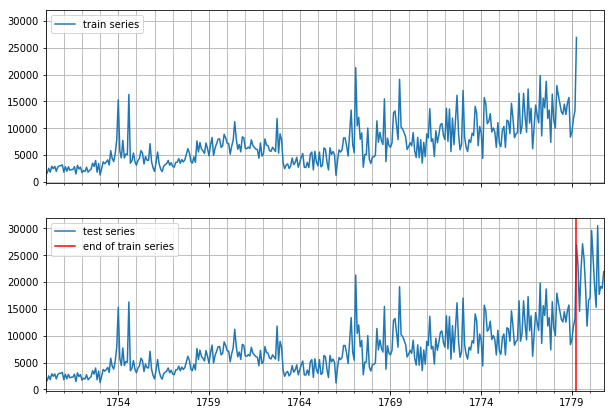

In [9]:
test_series = to_pandas(test_entry)
train_series = to_pandas(train_entry)

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 7))

train_series.plot(ax=ax[0])
ax[0].grid(which="both")
ax[0].legend(["train series"], loc="upper left")

test_series.plot(ax=ax[1])
ax[1].axvline(train_series.index[-1], color='r') # end of train dataset
ax[1].grid(which="both")
ax[1].legend(["test series", "end of train series"], loc="upper left")

plt.show()

In [10]:
from gluonts.trainer import Trainer
from gluonts.evaluation.backtest import make_evaluation_predictions
from gluonts.evaluation import Evaluator

from gluonts.model.deepar import DeepAREstimator

In [11]:
######################
### deepar wrapper ###
def deepar(data="m4_quarterly", seed=42, epochs=100, batches=50):

    dataset = get_dataset(data, regenerate=False)
    mx.random.seed(seed)
    np.random.seed(seed)

    trainer = Trainer(
        ctx=mx.cpu(0),
        epochs=epochs,
        num_batches_per_epoch=batches,
        learning_rate=1e-3,
    )
    
    estimator = DeepAREstimator(
        trainer=trainer,
        cardinality= [
            feat_static_cat.cardinality 
            for feat_static_cat in dataset.metadata.feat_static_cat
        ],
        context_length=dataset.metadata.prediction_length,
        prediction_length=dataset.metadata.prediction_length,
        freq=dataset.metadata.freq,
        use_feat_static_cat=True
    )

    # predictor = estimator.train(training_data=dataset.train,
    #                             validation_data=dataset.test)
    predictor = estimator.train(training_data=dataset.train)

    forecast_it, ts_it = make_evaluation_predictions(
        dataset.test, predictor=predictor, num_samples=100
    )

    agg_metrics, item_metrics = Evaluator()(
        ts_it, forecast_it, num_series=len(dataset.test)
    )

    metrics = ["MASE", "sMAPE", "MSIS", "wQuantileLoss[0.5]", "wQuantileLoss[0.9]"]
    output = {key: round(value, 8) for key, value in agg_metrics.items() if key in metrics}

    output["seed"] = seed
    output["epochs"] = epochs
    output["num_batches"] = batches

    df = pd.DataFrame([output])

    return df

## Results

## Study 1: `m4_monthly_end032014`

In [12]:
dataname

'm4_monthly_end032014'

In [ ]:
results = pd.DataFrame()

for i in range(42, 52):
    print("Seed:", i)
    df = deepar(data="m4_monthly_end032014", seed=i, epochs=100, batches=50)
    pprint(df)
    results = results.append(df)

print(dataname)
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly_end032014.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]

Seed: 42


INFO:root:Number of parameters in DeepARTrainingNetwork: 121513
100%|██████████| 50/50 [00:02<00:00, 22.68it/s, avg_epoch_loss=8.15]
INFO:root:Epoch[0] Elapsed time 2.207 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.151271
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 25.24it/s, avg_epoch_loss=7.6]
INFO:root:Epoch[1] Elapsed time 1.983 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.599017
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 25.50it/s, avg_epoch_loss=7.49]
INFO:root:Epoch[2] Elapsed time 1.963 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.487008
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 24.89it/s, avg_epoch_loss=7.27]
INFO:root:Epoch[3] Elapsed time 2.011 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.267818
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 23.03it/s, avg_epoch_loss=7.21]
INFO

100%|██████████| 50/50 [00:02<00:00, 24.68it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[37] Elapsed time 2.028 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.718765
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 25.53it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[38] Elapsed time 1.961 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.688535
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 26.90it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[39] Elapsed time 1.861 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.709173
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 24.71it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[40] Elapsed time 2.027 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.716182
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 24.23it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[41] Elapsed time 2.065 seconds
INFO:roo

100%|██████████| 50/50 [00:01<00:00, 26.52it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[74] Elapsed time 1.887 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.580970
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 50/50 [00:02<00:00, 24.90it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[75] Elapsed time 2.013 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.672424
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 50/50 [00:02<00:00, 24.46it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[76] Elapsed time 2.047 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.550844
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 50/50 [00:02<00:00, 24.58it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[77] Elapsed time 2.036 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.558845
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 50/50 [00:02<00:00, 24.06it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[78] Elapsed time 2.082 seconds
INFO

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.074203  0.183175  15.356304            0.168444            0.131406   

   seed  epochs  num_batches  
0    42     100           50  
Seed: 43


INFO:root:Number of parameters in DeepARTrainingNetwork: 121513
100%|██████████| 50/50 [00:02<00:00, 23.01it/s, avg_epoch_loss=8.13]
INFO:root:Epoch[0] Elapsed time 2.175 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.127494
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 25.45it/s, avg_epoch_loss=7.54]
INFO:root:Epoch[1] Elapsed time 1.966 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.543767
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 25.94it/s, avg_epoch_loss=7.34]
INFO:root:Epoch[2] Elapsed time 1.929 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.337388
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 25.91it/s, avg_epoch_loss=7.19]
INFO:root:Epoch[3] Elapsed time 1.932 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.194243
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 25.82it/s, avg_epoch_loss=7.12]
INF

100%|██████████| 50/50 [00:01<00:00, 25.97it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[37] Elapsed time 1.927 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.713252
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 25.22it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[38] Elapsed time 1.987 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.676159
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 24.25it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[39] Elapsed time 2.065 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.733184
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 24.19it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[40] Elapsed time 2.069 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.627745
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 26.63it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[41] Elapsed time 1.880 seconds
INFO:roo

100%|██████████| 50/50 [00:01<00:00, 26.16it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[74] Elapsed time 1.914 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.599083
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 27.25it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[75] Elapsed time 1.837 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.614083
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 27.95it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[76] Elapsed time 1.791 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.678672
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 26.23it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[77] Elapsed time 1.908 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.609830
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 50/50 [00:02<00:00, 24.81it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[78] Elapsed time 2.018 seconds
INFO:

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.093946  0.184399  17.048686            0.169587            0.136346   

   seed  epochs  num_batches  
0    43     100           50  
Seed: 44


INFO:root:Number of parameters in DeepARTrainingNetwork: 121513
100%|██████████| 50/50 [00:02<00:00, 22.45it/s, avg_epoch_loss=8.01]
INFO:root:Epoch[0] Elapsed time 2.231 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.006069
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 24.34it/s, avg_epoch_loss=7.39]
INFO:root:Epoch[1] Elapsed time 2.056 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.393610
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 26.12it/s, avg_epoch_loss=7.24]
INFO:root:Epoch[2] Elapsed time 1.916 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.237017
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 27.87it/s, avg_epoch_loss=7.18]
INFO:root:Epoch[3] Elapsed time 1.796 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.179376
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 27.54it/s, avg_epoch_loss=7.15]
INF

100%|██████████| 50/50 [00:01<00:00, 27.38it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[37] Elapsed time 1.832 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.637960
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 27.35it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[38] Elapsed time 1.832 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.798749
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 26.16it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[39] Elapsed time 1.916 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.794301
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 23.87it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[40] Elapsed time 2.097 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.669038
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 28.29it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[41] Elapsed time 1.769 seconds
INFO:root

100%|██████████| 50/50 [00:01<00:00, 26.83it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[74] Elapsed time 1.868 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.604042
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 27.64it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[75] Elapsed time 1.811 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.627958
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 27.53it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[76] Elapsed time 1.819 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.618707
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 24.46it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[77] Elapsed time 2.046 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.548610
INFO:root:Epoch[78] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 23.86it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[78] Elapsed time 2.098 seconds
I

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.084164  0.183944  15.578929            0.168789            0.133901   

   seed  epochs  num_batches  
0    44     100           50  
Seed: 45


100%|██████████| 50/50 [00:02<00:00, 24.23it/s, avg_epoch_loss=8.1]
INFO:root:Epoch[0] Elapsed time 2.066 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.099146
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 26.98it/s, avg_epoch_loss=7.65]
INFO:root:Epoch[1] Elapsed time 1.855 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.646582
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 26.54it/s, avg_epoch_loss=7.3]
INFO:root:Epoch[2] Elapsed time 1.887 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.302167
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 25.63it/s, avg_epoch_loss=7.21]
INFO:root:Epoch[3] Elapsed time 1.955 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.205295
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 25.19it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[4] Elapsed time 1.987 seconds
INFO:root:Epoch[4] Eval

INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 24.62it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[38] Elapsed time 2.034 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.703114
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 23.99it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[39] Elapsed time 2.086 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.707755
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 24.50it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[40] Elapsed time 2.045 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.720822
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 24.32it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[41] Elapsed time 2.058 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=6.770880
INFO:root:Epoch[42] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 25.66it/s, avg_epoch_loss=6.61]
INFO:root:Epo

INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 24.65it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[75] Elapsed time 2.030 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.527226
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 24.02it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[76] Elapsed time 2.084 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.600667
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 25.75it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[77] Elapsed time 1.944 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.571744
INFO:root:Epoch[78] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 25.34it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[78] Elapsed time 1.975 seconds
INFO:root:Epoch[78] Evaluation metric 'epoch_loss'=6.578895
INFO:root:Epoch[79] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 26.88it/s, avg_epoch_loss=6.59]
INF

       MASE   sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.083041  0.1829  15.032559            0.169229            0.132592    45   

   epochs  num_batches  
0     100           50  
Seed: 46


INFO:root:Number of parameters in DeepARTrainingNetwork: 121513
100%|██████████| 50/50 [00:02<00:00, 22.25it/s, avg_epoch_loss=8.21]
INFO:root:Epoch[0] Elapsed time 2.250 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.212799
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 24.39it/s, avg_epoch_loss=7.54]
INFO:root:Epoch[1] Elapsed time 2.052 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.542326
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 25.07it/s, avg_epoch_loss=7.34]
INFO:root:Epoch[2] Elapsed time 1.996 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.335957
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 23.57it/s, avg_epoch_loss=7.19]
INFO:root:Epoch[3] Elapsed time 2.123 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.187994
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 25.35it/s, avg_epoch_loss=7.16]
INF

100%|██████████| 50/50 [00:01<00:00, 26.19it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[37] Elapsed time 1.911 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.740655
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 26.77it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[38] Elapsed time 1.870 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.713359
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 27.89it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[39] Elapsed time 1.798 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.776092
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 27.86it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[40] Elapsed time 1.796 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.709420
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 27.67it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[41] Elapsed time 1.810 seconds
INFO:roo

INFO:root:Epoch[74] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 27.26it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[74] Elapsed time 1.839 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.630479
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 27.33it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[75] Elapsed time 1.831 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.658102
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 27.32it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[76] Elapsed time 1.832 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.614024
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 29.48it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[77] Elapsed time 1.697 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.641999
INFO:root:Epoch[78] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 27.60it/s, avg_epoch_loss=6.65]
IN

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.101808  0.182471  15.936114            0.168781            0.132108   

   seed  epochs  num_batches  
0    46     100           50  
Seed: 47


INFO:root:Number of parameters in DeepARTrainingNetwork: 121513
100%|██████████| 50/50 [00:02<00:00, 24.25it/s, avg_epoch_loss=8.16]
INFO:root:Epoch[0] Elapsed time 2.065 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.163942
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 27.10it/s, avg_epoch_loss=7.57]
INFO:root:Epoch[1] Elapsed time 1.847 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.573269
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 25.86it/s, avg_epoch_loss=7.32]
INFO:root:Epoch[2] Elapsed time 1.935 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.323655
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 25.88it/s, avg_epoch_loss=7.25]
INFO:root:Epoch[3] Elapsed time 1.934 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.247335
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 26.86it/s, avg_epoch_loss=7.13]
INF

100%|██████████| 50/50 [00:01<00:00, 27.75it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[37] Elapsed time 1.803 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.786457
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 27.60it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[38] Elapsed time 1.813 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.673484
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 26.56it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[39] Elapsed time 1.887 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.721393
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 26.13it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[40] Elapsed time 1.916 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.732404
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 28.08it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[41] Elapsed time 1.782 seconds
INFO:roo

INFO:root:Epoch[74] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 25.50it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[74] Elapsed time 1.962 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.589595
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 24.98it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[75] Elapsed time 2.008 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.575719
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 26.04it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[76] Elapsed time 1.922 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.614886
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 25.61it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[77] Elapsed time 1.955 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.579946
INFO:root:Loading parameters from best epoch (67)
INFO:root:Epoch[78] Learning rate is 0.000125
100%|██████████| 50/

       MASE    sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.081726  0.18215  15.698267            0.169208            0.130841    47   

   epochs  num_batches  
0     100           50  
Seed: 48


100%|██████████| 50/50 [00:01<00:00, 25.73it/s, avg_epoch_loss=7.87]
INFO:root:Epoch[0] Elapsed time 1.946 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.874424
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 25.66it/s, avg_epoch_loss=7.53]
INFO:root:Epoch[1] Elapsed time 1.956 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.528053
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 27.25it/s, avg_epoch_loss=7.32]
INFO:root:Epoch[2] Elapsed time 1.836 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.317799
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 26.16it/s, avg_epoch_loss=7.2]
INFO:root:Epoch[3] Elapsed time 1.913 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.201005
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 24.05it/s, avg_epoch_loss=7.15]
INFO:root:Epoch[4] Elapsed time 2.081 seconds
INFO:root:Epoch[4] Eva

INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.629701
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 28.10it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[38] Elapsed time 1.783 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.768255
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 26.76it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[39] Elapsed time 1.871 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.655634
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 26.67it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[40] Elapsed time 1.877 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.709424
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 27.77it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[41] Elapsed time 1.802 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=6.592369
INFO:root:Epoch[42] Learning rate is 0.0005
100%|██████████|

INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.650392
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 27.15it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[75] Elapsed time 1.845 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.663556
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 26.85it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[76] Elapsed time 1.864 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.616404
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 25.00it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[77] Elapsed time 2.001 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.636232
INFO:root:Epoch[78] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 25.89it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[78] Elapsed time 1.933 seconds
INFO:root:Epoch[78] Evaluation metric 'epoch_loss'=6.592804
INFO:root:Epoch[79] Learning rate is 0.00025
100%|██████

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.106251  0.185929  16.195313            0.173217            0.135769   

   seed  epochs  num_batches  
0    48     100           50  
Seed: 49


INFO:root:Number of parameters in DeepARTrainingNetwork: 121513
100%|██████████| 50/50 [00:02<00:00, 23.25it/s, avg_epoch_loss=8.04]
INFO:root:Epoch[0] Elapsed time 2.156 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.035864
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 23.13it/s, avg_epoch_loss=7.62]
INFO:root:Epoch[1] Elapsed time 2.163 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.617952
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 24.24it/s, avg_epoch_loss=7.41]
INFO:root:Epoch[2] Elapsed time 2.064 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.410762
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 24.61it/s, avg_epoch_loss=7.21]
INFO:root:Epoch[3] Elapsed time 2.033 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.211054
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 26.37it/s, avg_epoch_loss=7.33]
INF

100%|██████████| 50/50 [00:01<00:00, 27.07it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[37] Elapsed time 1.849 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.714095
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 28.17it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[38] Elapsed time 1.777 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.780974
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 26.26it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[39] Elapsed time 1.906 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.718263
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 24.28it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[40] Elapsed time 2.064 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.694761
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 25.37it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[41] Elapsed time 1.973 seconds
INFO:root

100%|██████████| 50/50 [00:02<00:00, 23.55it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[74] Elapsed time 2.128 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.586884
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 26.53it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[75] Elapsed time 1.886 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.573717
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 25.96it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[76] Elapsed time 1.930 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.612935
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 27.18it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[77] Elapsed time 1.842 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.609087
INFO:root:Epoch[78] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 25.63it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[78] Elapsed time 1.953 seconds


       MASE    sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.106861  0.18472  16.393083            0.172156            0.135298    49   

   epochs  num_batches  
0     100           50  
Seed: 50


INFO:root:Number of parameters in DeepARTrainingNetwork: 121513
100%|██████████| 50/50 [00:02<00:00, 22.06it/s, avg_epoch_loss=7.9]
INFO:root:Epoch[0] Elapsed time 2.268 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.902594
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 25.37it/s, avg_epoch_loss=7.55]
INFO:root:Epoch[1] Elapsed time 1.973 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.545072
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 25.04it/s, avg_epoch_loss=7.3]
INFO:root:Epoch[2] Elapsed time 1.998 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.298884
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 26.07it/s, avg_epoch_loss=7.24]
INFO:root:Epoch[3] Elapsed time 1.920 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.241807
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 26.34it/s, avg_epoch_loss=7.09]
INFO:

100%|██████████| 50/50 [00:01<00:00, 26.13it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[37] Elapsed time 1.915 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.716605
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 25.81it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[38] Elapsed time 1.939 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.701603
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 25.20it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[39] Elapsed time 1.987 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.727378
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 27.14it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[40] Elapsed time 1.844 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.792329
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 27.96it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[41] Elapsed time 1.790 seconds
INFO:root

100%|██████████| 50/50 [00:01<00:00, 25.35it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[74] Elapsed time 1.975 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.652507
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 50/50 [00:02<00:00, 24.75it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[75] Elapsed time 2.023 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.630287
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 50/50 [00:02<00:00, 23.92it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[76] Elapsed time 2.092 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.527607
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 25.69it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[77] Elapsed time 1.949 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.583649
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 27.05it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[78] Elapsed time 1.850 seconds
INFO

       MASE     sMAPE      MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.261609  0.194329  19.92032            0.183671            0.145241    50   

   epochs  num_batches  
0     100           50  
Seed: 51


INFO:root:Number of parameters in DeepARTrainingNetwork: 121513
100%|██████████| 50/50 [00:02<00:00, 22.03it/s, avg_epoch_loss=8.06]
INFO:root:Epoch[0] Elapsed time 2.272 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.063927
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 25.26it/s, avg_epoch_loss=7.61]
INFO:root:Epoch[1] Elapsed time 1.981 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.607506
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 23.56it/s, avg_epoch_loss=7.33]
INFO:root:Epoch[2] Elapsed time 2.124 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.331830
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 24.09it/s, avg_epoch_loss=7.19]
INFO:root:Epoch[3] Elapsed time 2.078 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.192621
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 27.20it/s, avg_epoch_loss=7.13]
INF

100%|██████████| 50/50 [00:01<00:00, 26.95it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[37] Elapsed time 1.858 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.666751
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 25.88it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[38] Elapsed time 1.934 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.668432
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 26.60it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[39] Elapsed time 1.882 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.631656
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 25.29it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[40] Elapsed time 1.979 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.577751
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 50/50 [00:02<00:00, 24.26it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[41] Elapsed time 2.063 seconds
INFO

100%|██████████| 50/50 [00:01<00:00, 26.75it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[74] Elapsed time 1.872 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.695270
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 26.99it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[75] Elapsed time 1.857 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.598129
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 28.06it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[76] Elapsed time 1.785 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.554952
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 25.16it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[77] Elapsed time 1.990 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.649198
INFO:root:Epoch[78] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 25.62it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[78] Elapsed time 1.953 seconds
IN

       MASE     sMAPE     MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.171846  0.187369  17.1997            0.176558            0.138278    51   

   epochs  num_batches  
0     100           50  
m4_monthly_end092007


,MASE,sMAPE,MSIS,wQuantileLoss[0.5],wQuantileLoss[0.9],seed,epochs,num_batches
0,1.074203,0.183175,15.356304,0.168444,0.131406,42,100,50
0,1.093946,0.184399,17.048686,0.169587,0.136346,43,100,50
0,1.084164,0.183944,15.578929,0.168789,0.133901,44,100,50
0,1.083041,0.182900,15.032559,0.169229,0.132592,45,100,50
0,1.101808,0.182471,15.936114,0.168781,0.132108,46,100,50
0,1.081726,0.182150,15.698267,0.169208,0.130841,47,100,50
0,1.106251,0.185929,16.195313,0.173217,0.135769,48,100,50
0,1.106861,0.184720,16.393083,0.172156,0.135298,49,100,50
0,1.261609,0.194329,19.920320,0.183671,0.145241,50,100,50
0,1.171846,0.187369,17.199700,0.176558,0.138278,51,100,50


In [ ]:
results = pd.DataFrame()

for i in range(42, 47):
    print("Seed:", i)
    df = deepar(data="m4_monthly_end032014", seed=i, epochs=400, batches=200)
    pprint(df)
    results = results.append(df)

print(dataname)
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly_end032014.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/200 [00:00<?, ?it/s]

Seed: 42


INFO:root:Number of parameters in DeepARTrainingNetwork: 121513
100%|██████████| 200/200 [00:07<00:00, 26.19it/s, avg_epoch_loss=7.63]
INFO:root:Epoch[0] Elapsed time 7.649 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.626279
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 27.72it/s, avg_epoch_loss=7.12]
INFO:root:Epoch[1] Elapsed time 7.217 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.123759
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 27.38it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[2] Elapsed time 7.306 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.978610
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 27.67it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[3] Elapsed time 7.229 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.852208
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 27.57it/s, avg_epoch_loss

100%|██████████| 200/200 [00:07<00:00, 27.37it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[37] Elapsed time 7.310 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.584985
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 27.45it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[38] Elapsed time 7.289 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.533120
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 27.44it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[39] Elapsed time 7.289 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.566223
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 27.91it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[40] Elapsed time 7.168 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.526643
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 27.81it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[41] Elapsed time 7.192 second

INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.399716
INFO:root:Epoch[111] Learning rate is 0.00025
100%|██████████| 200/200 [00:06<00:00, 28.58it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[111] Elapsed time 7.000 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.413210
INFO:root:Epoch[112] Learning rate is 0.00025
100%|██████████| 200/200 [00:06<00:00, 28.76it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[112] Elapsed time 6.955 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.422593
INFO:root:Epoch[113] Learning rate is 0.00025
100%|██████████| 200/200 [00:07<00:00, 28.28it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[113] Elapsed time 7.073 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.411720
INFO:root:Epoch[114] Learning rate is 0.00025
100%|██████████| 200/200 [00:07<00:00, 28.48it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[114] Elapsed time 7.026 seconds
INFO:root:Epoch[114] Evaluation metric 'epoch_loss'=6.372565
INFO:root:Epoch[115] Learning rate 

100%|██████████| 200/200 [00:07<00:00, 28.45it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[182] Elapsed time 7.031 seconds
INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=6.409607
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 28.61it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[183] Elapsed time 6.991 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.351918
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 28.92it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[184] Elapsed time 6.917 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.412660
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 28.60it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[185] Elapsed time 6.996 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.370732
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 28.66it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[186] Elapsed time

INFO:root:Epoch[219] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 29.09it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[219] Elapsed time 6.877 seconds
INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=6.418149
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 28.28it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[220] Elapsed time 7.074 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.365950
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 28.51it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[221] Elapsed time 7.015 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.435202
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 29.21it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[222] Elapsed time 6.848 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.380153
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 28.49it/s, avg_epoch_

INFO:root:Epoch[255] Evaluation metric 'epoch_loss'=6.392903
INFO:root:Epoch[256] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.97it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[256] Elapsed time 7.151 seconds
INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=6.370471
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.88it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[257] Elapsed time 7.179 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=6.379252
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 28.13it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[258] Elapsed time 7.112 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.423223
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.96it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[259] Elapsed time 7.154 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=6.382513
INFO:root:Epoch[260] Learning rate is 5e-05

INFO:root:Epoch[329] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.57it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[329] Elapsed time 7.256 seconds
INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=6.338986
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.63it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[330] Elapsed time 7.240 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.398481
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.65it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[331] Elapsed time 7.235 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=6.392754
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.76it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[332] Elapsed time 7.207 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.399464
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.88it/s, avg_epoch_lo

INFO:root:Epoch[365] Evaluation metric 'epoch_loss'=6.384109
INFO:root:Epoch[366] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.71it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[366] Elapsed time 7.220 seconds
INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=6.353630
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.29it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[367] Elapsed time 7.330 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=6.394198
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.76it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[368] Elapsed time 7.207 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=6.368675
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.57it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[369] Elapsed time 7.257 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=6.375948
INFO:root:Epoch[370] Learning rate is 5e-05

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.113192  0.190725  16.880806            0.177149            0.136323   

   seed  epochs  num_batches  
0    42     400          200  
Seed: 43


INFO:root:Number of parameters in DeepARTrainingNetwork: 121513
100%|██████████| 200/200 [00:07<00:00, 26.07it/s, avg_epoch_loss=7.55]
INFO:root:Epoch[0] Elapsed time 7.675 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.550723
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 27.27it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[1] Elapsed time 7.337 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.025766
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 27.35it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[2] Elapsed time 7.315 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.855368
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 26.96it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[3] Elapsed time 7.420 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.766893
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 27.25it/s, avg_epoch_loss

100%|██████████| 200/200 [00:07<00:00, 27.49it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[37] Elapsed time 7.277 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.512816
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 27.55it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[38] Elapsed time 7.263 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.555605
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 27.49it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[39] Elapsed time 7.278 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.539796
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 27.57it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[40] Elapsed time 7.257 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.564686
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 27.63it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[41] Elapsed time 7.240 second

INFO:root:Epoch[111] Learning rate is 0.0005
100%|██████████| 200/200 [00:07<00:00, 27.38it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[111] Elapsed time 7.310 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.388111
INFO:root:Epoch[112] Learning rate is 0.0005
100%|██████████| 200/200 [00:07<00:00, 27.19it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[112] Elapsed time 7.359 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.420083
INFO:root:Epoch[113] Learning rate is 0.0005
100%|██████████| 200/200 [00:07<00:00, 27.45it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[113] Elapsed time 7.287 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.403039
INFO:root:Epoch[114] Learning rate is 0.0005
100%|██████████| 200/200 [00:07<00:00, 27.25it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[114] Elapsed time 7.342 seconds
INFO:root:Epoch[114] Evaluation metric 'epoch_loss'=6.410344
INFO:root:Epoch[115] Learning rate is 0.0005
100%|██████████| 200/200 [00:07<00:00, 27.56it/s, avg_ep

INFO:root:Epoch[147] Learning rate is 0.000125
100%|██████████| 200/200 [00:07<00:00, 27.61it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[147] Elapsed time 7.245 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.399593
INFO:root:Epoch[148] Learning rate is 0.000125
100%|██████████| 200/200 [00:07<00:00, 27.44it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[148] Elapsed time 7.291 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.330594
INFO:root:Epoch[149] Learning rate is 0.000125
100%|██████████| 200/200 [00:07<00:00, 27.57it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[149] Elapsed time 7.256 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.436317
INFO:root:Epoch[150] Learning rate is 0.000125
100%|██████████| 200/200 [00:07<00:00, 27.18it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[150] Elapsed time 7.361 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.383524
INFO:root:Epoch[151] Learning rate is 0.000125
100%|██████████| 200/200 [00:07<00:00, 27.39it

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.08it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[183] Elapsed time 7.388 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.370302
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.46it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[184] Elapsed time 7.286 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.376471
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.37it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[185] Elapsed time 7.308 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.358294
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.72it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[186] Elapsed time 7.219 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.402884
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.51it/s, avg_epoch_l

INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=6.334000
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.40it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[220] Elapsed time 7.300 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.400021
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.38it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[221] Elapsed time 7.307 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.333244
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.57it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[222] Elapsed time 7.257 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.425762
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.69it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[223] Elapsed time 7.224 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.374014
INFO:root:Epoch[224] Learning rate is 5e-05


INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.23it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[293] Elapsed time 7.348 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.395228
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.16it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[294] Elapsed time 7.367 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.377162
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.22it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[295] Elapsed time 7.349 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.357273
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.31it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[296] Elapsed time 7.326 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.411589
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.34it/s, avg_epoch_l

INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=6.321106
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 29.12it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[330] Elapsed time 6.872 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.389113
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.55it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[331] Elapsed time 7.260 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=6.338734
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 28.11it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[332] Elapsed time 7.118 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.391427
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 28.25it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[333] Elapsed time 7.080 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.344908
INFO:root:Epoch[334] Learning rate is 5e-05

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.132496  0.194118  17.538177            0.177592            0.137419   

   seed  epochs  num_batches  
0    43     400          200  
Seed: 44


INFO:root:Number of parameters in DeepARTrainingNetwork: 121513
100%|██████████| 200/200 [00:07<00:00, 28.06it/s, avg_epoch_loss=7.45]
INFO:root:Epoch[0] Elapsed time 7.129 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.454018
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 28.25it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[1] Elapsed time 7.080 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.027347
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 28.51it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[2] Elapsed time 7.017 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.888813
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 28.56it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[3] Elapsed time 7.003 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.830829
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:06<00:00, 28.94it/s, avg_epoch_loss

100%|██████████| 200/200 [00:07<00:00, 27.26it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[37] Elapsed time 7.339 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.526439
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 28.15it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[38] Elapsed time 7.107 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.552406
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 28.29it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[39] Elapsed time 7.073 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.536133
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 28.11it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[40] Elapsed time 7.117 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.564249
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 200/200 [00:06<00:00, 28.61it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[41] Elapsed time 6.993 seconds

INFO:root:Epoch[74] Learning rate is 0.0005
100%|██████████| 200/200 [00:07<00:00, 28.02it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[74] Elapsed time 7.140 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.438152
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 200/200 [00:07<00:00, 28.23it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[75] Elapsed time 7.087 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.455306
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 200/200 [00:07<00:00, 28.18it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[76] Elapsed time 7.101 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.470068
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 200/200 [00:07<00:00, 27.78it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[77] Elapsed time 7.203 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.469264
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 200/200 [00:07<00:00, 27.94it/s, avg_epoch_loss=6.4

INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.420375
INFO:root:Epoch[111] Learning rate is 0.00025
100%|██████████| 200/200 [00:07<00:00, 27.77it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[111] Elapsed time 7.205 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.424613
INFO:root:Epoch[112] Learning rate is 0.00025
100%|██████████| 200/200 [00:07<00:00, 27.63it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[112] Elapsed time 7.240 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.395472
INFO:root:Epoch[113] Learning rate is 0.00025
100%|██████████| 200/200 [00:07<00:00, 27.61it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[113] Elapsed time 7.244 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.408131
INFO:root:Epoch[114] Learning rate is 0.00025
100%|██████████| 200/200 [00:07<00:00, 28.05it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[114] Elapsed time 7.133 seconds
INFO:root:Epoch[114] Evaluation metric 'epoch_loss'=6.401602
INFO:root:Epoch[115] Learning rate is

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.44it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[183] Elapsed time 7.291 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.414499
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.56it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[184] Elapsed time 7.258 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.382678
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.40it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[185] Elapsed time 7.304 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.418541
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.88it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[186] Elapsed time 7.174 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.376504
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.89it/s, avg_epoch_

INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=6.362407
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.62it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[220] Elapsed time 7.243 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.398804
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.36it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[221] Elapsed time 7.312 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.398320
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.78it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[222] Elapsed time 7.203 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.373011
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.51it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[223] Elapsed time 7.272 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.399727
INFO:root:Epoch[224] Learning rate is 5e-05
10

INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.61it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[293] Elapsed time 7.247 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.378670
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.57it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[294] Elapsed time 7.255 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.415236
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.91it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[295] Elapsed time 7.169 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.355824
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.81it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[296] Elapsed time 7.193 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.394861
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 28.08it/s, avg_epoch_

INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=6.409111
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.39it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[330] Elapsed time 7.303 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.368515
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.83it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[331] Elapsed time 7.187 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=6.383703
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 28.23it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[332] Elapsed time 7.085 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.381210
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.89it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[333] Elapsed time 7.173 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.377032
INFO:root:Epoch[334] Learning rate is 5e-05

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.162541  0.198683  18.535489            0.183936            0.145226   

   seed  epochs  num_batches  
0    44     400          200  
Seed: 45


INFO:root:Number of parameters in DeepARTrainingNetwork: 121513
100%|██████████| 200/200 [00:07<00:00, 26.97it/s, avg_epoch_loss=7.56]
INFO:root:Epoch[0] Elapsed time 7.418 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.563298
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 28.08it/s, avg_epoch_loss=7.02]
INFO:root:Epoch[1] Elapsed time 7.124 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.019902
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 27.69it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[2] Elapsed time 7.224 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.940351
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 27.51it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[3] Elapsed time 7.272 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.835694
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 27.56it/s, avg_epoch_loss

100%|██████████| 200/200 [00:07<00:00, 27.77it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[37] Elapsed time 7.205 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.546041
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 27.83it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[38] Elapsed time 7.189 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.520352
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 27.71it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[39] Elapsed time 7.219 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.557879
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 27.60it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[40] Elapsed time 7.249 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.561568
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 27.69it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[41] Elapsed time 7.225 second

INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.458351
INFO:root:Epoch[111] Learning rate is 0.00025
100%|██████████| 200/200 [00:07<00:00, 27.46it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[111] Elapsed time 7.285 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.401882
INFO:root:Epoch[112] Learning rate is 0.00025
100%|██████████| 200/200 [00:07<00:00, 27.43it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[112] Elapsed time 7.296 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.417151
INFO:root:Epoch[113] Learning rate is 0.00025
100%|██████████| 200/200 [00:07<00:00, 27.65it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[113] Elapsed time 7.238 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.383036
INFO:root:Epoch[114] Learning rate is 0.00025
100%|██████████| 200/200 [00:07<00:00, 27.39it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[114] Elapsed time 7.302 seconds
INFO:root:Epoch[114] Evaluation metric 'epoch_loss'=6.425231
INFO:root:Loading parameters from be

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.21it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[183] Elapsed time 7.351 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.377158
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.49it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[184] Elapsed time 7.277 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.403452
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.06it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[185] Elapsed time 7.393 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.336137
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.69it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[186] Elapsed time 7.227 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.416761
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.52it/s, avg_epoch_l

INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=6.422973
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.13it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[220] Elapsed time 7.374 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.333449
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.88it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[221] Elapsed time 7.445 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.406975
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.35it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[222] Elapsed time 7.313 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.373031
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.44it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[223] Elapsed time 7.291 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.402111
INFO:root:Epoch[224] Learning rate is 5e-05


INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.63it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[293] Elapsed time 7.241 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.345639
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.34it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[294] Elapsed time 7.318 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.387332
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.84it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[295] Elapsed time 7.186 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.368410
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.89it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[296] Elapsed time 7.174 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.373192
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 28.02it/s, avg_epoch_

INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=6.367067
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.10it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[330] Elapsed time 7.383 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.365749
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.17it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[331] Elapsed time 7.362 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=6.391991
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.44it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[332] Elapsed time 7.290 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.350738
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.55it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[333] Elapsed time 7.262 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.373794
INFO:root:Epoch[334] Learning rate is 5e-05

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.156619  0.195697  18.020213             0.18269            0.141381   

   seed  epochs  num_batches  
0    45     400          200  
Seed: 46


100%|██████████| 200/200 [00:07<00:00, 26.87it/s, avg_epoch_loss=7.57]
INFO:root:Epoch[0] Elapsed time 7.447 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.569769
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 27.57it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[1] Elapsed time 7.257 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.012932
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 27.29it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[2] Elapsed time 7.331 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.903368
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 27.74it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[3] Elapsed time 7.211 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.857064
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 27.66it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[4] Elapsed time 7.233 seconds
INFO:root:Ep

INFO:root:Loading parameters from best epoch (63)
INFO:root:Epoch[74] Learning rate is 0.00025
100%|██████████| 200/200 [00:07<00:00, 27.59it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[74] Elapsed time 7.250 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.419657
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 200/200 [00:07<00:00, 27.55it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[75] Elapsed time 7.263 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.470502
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 200/200 [00:07<00:00, 27.57it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[76] Elapsed time 7.260 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.427198
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 200/200 [00:07<00:00, 27.52it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[77] Elapsed time 7.270 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.484170
INFO:root:Epoch[78] Learning rate is 0.00025
100%|████████

INFO:root:Epoch[110] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:07<00:00, 27.80it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[110] Elapsed time 7.196 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.402991
INFO:root:Epoch[111] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:07<00:00, 28.06it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[111] Elapsed time 7.133 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.428509
INFO:root:Epoch[112] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:07<00:00, 27.92it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[112] Elapsed time 7.166 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.393139
INFO:root:Epoch[113] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:07<00:00, 27.69it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[113] Elapsed time 7.225 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.455089
INFO:root:Loading parameters from best epoch (93)
INFO:root:Epoch[114] Learning rate is 5e-05

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.77it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[183] Elapsed time 7.205 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.439733
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.20it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[184] Elapsed time 7.354 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.401071
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.33it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[185] Elapsed time 7.320 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.452374
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.82it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[186] Elapsed time 7.193 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.428398
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.60it/s, avg_epoch_l

INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=6.442465
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.15it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[220] Elapsed time 7.369 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.365911
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.47it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[221] Elapsed time 7.282 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.414108
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.50it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[222] Elapsed time 7.275 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.392932
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.73it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[223] Elapsed time 7.214 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.421897
INFO:root:Epoch[224] Learning rate is 5e-05

INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.73it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[293] Elapsed time 7.214 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.379613
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 28.55it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[294] Elapsed time 7.007 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.433848
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 28.17it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[295] Elapsed time 7.101 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.399786
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.66it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[296] Elapsed time 7.503 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.421950
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.99it/s, avg_epoch_l

INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=6.408183
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.36it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[330] Elapsed time 7.314 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.359266
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 28.07it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[331] Elapsed time 7.128 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=6.415801
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.79it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[332] Elapsed time 7.199 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.343084
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.64it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[333] Elapsed time 7.238 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.414539
INFO:root:Epoch[334] Learning rate is 5e-05

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.102571  0.190313  16.637752            0.175304            0.140212   

   seed  epochs  num_batches  
0    46     400          200  


NameError: name 'dataname' is not defined

In [4]:
results

,MASE,sMAPE,MSIS,wQuantileLoss[0.5],wQuantileLoss[0.9],seed,epochs,num_batches
0,1.113192,0.190725,16.880806,0.177149,0.136323,42,400,200
0,1.132496,0.194118,17.538177,0.177592,0.137419,43,400,200
0,1.162541,0.198683,18.535489,0.183936,0.145226,44,400,200
0,1.156619,0.195697,18.020213,0.182690,0.141381,45,400,200
0,1.102571,0.190313,16.637752,0.175304,0.140212,46,400,200


## Study 2: `m4_monthly_end052015`

In [5]:
dataname = "m4_monthly_end052015"
dataset = utils.get_dataset(dataname, regenerate=False)
len(dataset.train)

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly_end052015.


15700

In [6]:
results = pd.DataFrame()

for i in range(42, 47):
    print("Seed:", i)
    df = deepar(data="m4_monthly_end052015", seed=i, epochs=400, batches=200)
    pprint(df)
    results = results.append(df)

results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly_end052015.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/200 [00:00<?, ?it/s]

Seed: 42


INFO:root:Number of parameters in DeepARTrainingNetwork: 816163
100%|██████████| 200/200 [00:06<00:00, 29.95it/s, avg_epoch_loss=7.23]
INFO:root:Epoch[0] Elapsed time 6.680 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.234843
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:06<00:00, 31.83it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[1] Elapsed time 6.285 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.851309
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:06<00:00, 31.83it/s, avg_epoch_loss=7.02]
INFO:root:Epoch[2] Elapsed time 6.286 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.018160
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:06<00:00, 31.99it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[3] Elapsed time 6.254 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.680093
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:06<00:00, 31.38it/s, avg_epoch_loss

100%|██████████| 200/200 [00:06<00:00, 31.69it/s, avg_epoch_loss=5.91]
INFO:root:Epoch[37] Elapsed time 6.312 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=5.910837
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 200/200 [00:06<00:00, 29.50it/s, avg_epoch_loss=5.77]
INFO:root:Epoch[38] Elapsed time 6.781 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=5.769367
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 200/200 [00:06<00:00, 31.69it/s, avg_epoch_loss=5.89]
INFO:root:Epoch[39] Elapsed time 6.314 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=5.888894
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 200/200 [00:06<00:00, 31.03it/s, avg_epoch_loss=5.55]
INFO:root:Epoch[40] Elapsed time 6.447 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=5.550202
INFO:root:Loading parameters from best epoch (30)
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 200/200 [00:06<00:00, 30.71it/s, avg_epoch_loss=

100%|██████████| 200/200 [00:06<00:00, 28.97it/s, avg_epoch_loss=5.88]
INFO:root:Epoch[73] Elapsed time 6.905 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=5.884338
INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 200/200 [00:06<00:00, 29.70it/s, avg_epoch_loss=5.38]
INFO:root:Epoch[74] Elapsed time 6.735 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=5.383381
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 200/200 [00:06<00:00, 31.75it/s, avg_epoch_loss=5.69]
INFO:root:Epoch[75] Elapsed time 6.302 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=5.694180
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 200/200 [00:06<00:00, 31.45it/s, avg_epoch_loss=5.71]
INFO:root:Epoch[76] Elapsed time 6.361 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=5.709257
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 200/200 [00:06<00:00, 30.88it/s, avg_epoch_loss=5.61]
INFO:root:Epoch[77] Elapsed time 

100%|██████████| 200/200 [00:06<00:00, 30.87it/s, avg_epoch_loss=5.74]
INFO:root:Epoch[109] Elapsed time 6.482 seconds
INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=5.736850
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 29.25it/s, avg_epoch_loss=5.7]
INFO:root:Epoch[110] Elapsed time 6.840 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=5.701687
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 31.83it/s, avg_epoch_loss=5.47]
INFO:root:Epoch[111] Elapsed time 6.284 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=5.468389
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 29.48it/s, avg_epoch_loss=5.99]
INFO:root:Epoch[112] Elapsed time 6.787 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=5.985585
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 30.22it/s, avg_epoch_loss=5.43]
INFO:root:Epoch[113] Elapsed time 

INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 30.63it/s, avg_epoch_loss=5.65]
INFO:root:Epoch[146] Elapsed time 6.531 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=5.649799
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 29.62it/s, avg_epoch_loss=5.68]
INFO:root:Epoch[147] Elapsed time 6.755 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=5.682457
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 30.22it/s, avg_epoch_loss=5.54]
INFO:root:Epoch[148] Elapsed time 6.619 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=5.543391
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 31.42it/s, avg_epoch_loss=5.83]
INFO:root:Epoch[149] Elapsed time 6.368 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=5.826978
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 31.78it/s, avg_epoch_

INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=5.333319
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 31.60it/s, avg_epoch_loss=5.61]
INFO:root:Epoch[183] Elapsed time 6.330 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=5.612721
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 30.52it/s, avg_epoch_loss=5.69]
INFO:root:Epoch[184] Elapsed time 6.554 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=5.690217
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 30.56it/s, avg_epoch_loss=5.59]
INFO:root:Epoch[185] Elapsed time 6.547 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=5.594652
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 30.78it/s, avg_epoch_loss=5.67]
INFO:root:Epoch[186] Elapsed time 6.499 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=5.670940
INFO:root:Epoch[187] Learning rate is 5e-05

100%|██████████| 200/200 [00:06<00:00, 31.84it/s, avg_epoch_loss=5.52]
INFO:root:Epoch[219] Elapsed time 6.283 seconds
INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=5.517618
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 31.88it/s, avg_epoch_loss=5.85]
INFO:root:Epoch[220] Elapsed time 6.276 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=5.850726
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 30.84it/s, avg_epoch_loss=5.23]
INFO:root:Epoch[221] Elapsed time 6.486 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=5.226912
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 29.76it/s, avg_epoch_loss=5.65]
INFO:root:Epoch[222] Elapsed time 6.722 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=5.650382
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 30.56it/s, avg_epoch_loss=5.65]
INFO:root:Epoch[223] Elapsed time

INFO:root:Epoch[256] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 30.94it/s, avg_epoch_loss=5.57]
INFO:root:Epoch[256] Elapsed time 6.465 seconds
INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=5.570283
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 29.07it/s, avg_epoch_loss=5.7]
INFO:root:Epoch[257] Elapsed time 6.881 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=5.702330
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 30.49it/s, avg_epoch_loss=5.36]
INFO:root:Epoch[258] Elapsed time 6.561 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=5.355497
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 29.63it/s, avg_epoch_loss=5.73]
INFO:root:Epoch[259] Elapsed time 6.751 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=5.733741
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 30.70it/s, avg_epoch_l

INFO:root:Epoch[292] Evaluation metric 'epoch_loss'=5.275685
INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 30.74it/s, avg_epoch_loss=5.59]
INFO:root:Epoch[293] Elapsed time 6.508 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=5.589618
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 30.97it/s, avg_epoch_loss=5.66]
INFO:root:Epoch[294] Elapsed time 6.460 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=5.657655
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 29.47it/s, avg_epoch_loss=5.47]
INFO:root:Epoch[295] Elapsed time 6.788 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=5.465480
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 31.70it/s, avg_epoch_loss=5.78]
INFO:root:Epoch[296] Elapsed time 6.312 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=5.782522
INFO:root:Epoch[297] Learning rate is 5e-05

100%|██████████| 200/200 [00:06<00:00, 30.81it/s, avg_epoch_loss=5.32]
INFO:root:Epoch[329] Elapsed time 6.494 seconds
INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=5.320481
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 29.17it/s, avg_epoch_loss=5.76]
INFO:root:Epoch[330] Elapsed time 6.859 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=5.764866
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 29.46it/s, avg_epoch_loss=5.45]
INFO:root:Epoch[331] Elapsed time 6.793 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=5.446531
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 30.69it/s, avg_epoch_loss=5.66]
INFO:root:Epoch[332] Elapsed time 6.518 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=5.658567
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 31.47it/s, avg_epoch_loss=5.55]
INFO:root:Epoch[333] Elapsed time

INFO:root:Epoch[366] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 29.44it/s, avg_epoch_loss=5.49]
INFO:root:Epoch[366] Elapsed time 6.796 seconds
INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=5.486997
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 30.31it/s, avg_epoch_loss=5.79]
INFO:root:Epoch[367] Elapsed time 6.600 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=5.788625
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 31.87it/s, avg_epoch_loss=5.27]
INFO:root:Epoch[368] Elapsed time 6.278 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=5.269292
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 30.25it/s, avg_epoch_loss=5.55]
INFO:root:Epoch[369] Elapsed time 6.615 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=5.551269
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 28.40it/s, avg_epoch_

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  0.997648  0.073244  11.403422            0.076279            0.045692   

   seed  epochs  num_batches  
0    42     400          200  
Seed: 43


INFO:root:Number of parameters in DeepARTrainingNetwork: 816163
100%|██████████| 200/200 [00:08<00:00, 24.66it/s, avg_epoch_loss=7.36]
INFO:root:Epoch[0] Elapsed time 8.118 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.359680
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:08<00:00, 23.23it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[1] Elapsed time 8.610 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.858808
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:08<00:00, 23.95it/s, avg_epoch_loss=7.02]
INFO:root:Epoch[2] Elapsed time 8.353 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.022077
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:08<00:00, 24.74it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[3] Elapsed time 8.086 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.378148
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 25.43it/s, avg_epoch_loss

100%|██████████| 200/200 [00:07<00:00, 25.72it/s, avg_epoch_loss=5.78]
INFO:root:Epoch[37] Elapsed time 7.779 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=5.776011
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 25.91it/s, avg_epoch_loss=5.88]
INFO:root:Epoch[38] Elapsed time 7.721 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=5.877993
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 25.63it/s, avg_epoch_loss=5.81]
INFO:root:Epoch[39] Elapsed time 7.806 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=5.813549
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 200/200 [00:08<00:00, 24.85it/s, avg_epoch_loss=5.64]
INFO:root:Epoch[40] Elapsed time 8.052 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=5.640736
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 25.58it/s, avg_epoch_loss=6.06]
INFO:root:Epoch[41] Elapsed time 7.821 second

100%|██████████| 200/200 [00:08<00:00, 24.72it/s, avg_epoch_loss=5.95]
INFO:root:Epoch[73] Elapsed time 8.092 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=5.946720
INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 200/200 [00:08<00:00, 23.48it/s, avg_epoch_loss=5.37]
INFO:root:Epoch[74] Elapsed time 8.521 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=5.373553
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 200/200 [00:08<00:00, 24.49it/s, avg_epoch_loss=5.7]
INFO:root:Epoch[75] Elapsed time 8.169 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=5.701164
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 200/200 [00:08<00:00, 24.81it/s, avg_epoch_loss=5.73]
INFO:root:Epoch[76] Elapsed time 8.065 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=5.734834
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 200/200 [00:08<00:00, 24.91it/s, avg_epoch_loss=5.61]
INFO:root:Epoch[77] Elapsed time 8

100%|██████████| 200/200 [00:08<00:00, 23.73it/s, avg_epoch_loss=5.66]
INFO:root:Epoch[109] Elapsed time 8.434 seconds
INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=5.659825
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 23.79it/s, avg_epoch_loss=5.84]
INFO:root:Epoch[110] Elapsed time 8.409 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=5.841475
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 23.99it/s, avg_epoch_loss=5.43]
INFO:root:Epoch[111] Elapsed time 8.338 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=5.431685
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 24.71it/s, avg_epoch_loss=5.78]
INFO:root:Epoch[112] Elapsed time 8.096 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=5.775816
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 23.77it/s, avg_epoch_loss=5.64]
INFO:root:Epoch[113] Elapsed time

INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 23.87it/s, avg_epoch_loss=5.7]
INFO:root:Epoch[146] Elapsed time 8.384 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=5.701022
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 24.56it/s, avg_epoch_loss=5.64]
INFO:root:Epoch[147] Elapsed time 8.147 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=5.641596
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 23.90it/s, avg_epoch_loss=5.6]
INFO:root:Epoch[148] Elapsed time 8.368 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=5.597465
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 24.13it/s, avg_epoch_loss=5.89]
INFO:root:Epoch[149] Elapsed time 8.293 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=5.890734
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.30it/s, avg_epoch_lo

INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=5.358252
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 23.64it/s, avg_epoch_loss=5.77]
INFO:root:Epoch[183] Elapsed time 8.461 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=5.774995
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 23.26it/s, avg_epoch_loss=5.52]
INFO:root:Epoch[184] Elapsed time 8.601 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=5.521194
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 24.47it/s, avg_epoch_loss=5.69]
INFO:root:Epoch[185] Elapsed time 8.174 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=5.686379
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 23.65it/s, avg_epoch_loss=5.6]
INFO:root:Epoch[186] Elapsed time 8.462 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=5.599308
INFO:root:Epoch[187] Learning rate is 5e-05


100%|██████████| 200/200 [00:08<00:00, 23.26it/s, avg_epoch_loss=5.53]
INFO:root:Epoch[219] Elapsed time 8.601 seconds
INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=5.533840
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 23.88it/s, avg_epoch_loss=5.89]
INFO:root:Epoch[220] Elapsed time 8.375 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=5.885209
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 23.73it/s, avg_epoch_loss=5.22]
INFO:root:Epoch[221] Elapsed time 8.429 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=5.217108
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 23.93it/s, avg_epoch_loss=5.64]
INFO:root:Epoch[222] Elapsed time 8.359 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=5.639762
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 23.91it/s, avg_epoch_loss=5.68]
INFO:root:Epoch[223] Elapsed time

INFO:root:Epoch[256] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.98it/s, avg_epoch_loss=5.49]
INFO:root:Epoch[256] Elapsed time 7.700 seconds
INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=5.488436
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 24.56it/s, avg_epoch_loss=5.79]
INFO:root:Epoch[257] Elapsed time 8.147 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=5.790354
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.23it/s, avg_epoch_loss=5.32]
INFO:root:Epoch[258] Elapsed time 7.930 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=5.321531
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 24.37it/s, avg_epoch_loss=5.56]
INFO:root:Epoch[259] Elapsed time 8.210 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=5.561656
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 24.04it/s, avg_epoch_

INFO:root:Epoch[292] Evaluation metric 'epoch_loss'=5.565996
INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 23.89it/s, avg_epoch_loss=5.6]
INFO:root:Epoch[293] Elapsed time 8.372 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=5.599625
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 23.94it/s, avg_epoch_loss=5.65]
INFO:root:Epoch[294] Elapsed time 8.357 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=5.647985
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 24.94it/s, avg_epoch_loss=5.35]
INFO:root:Epoch[295] Elapsed time 8.023 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=5.345530
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 24.64it/s, avg_epoch_loss=5.8]
INFO:root:Epoch[296] Elapsed time 8.117 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=5.802433
INFO:root:Epoch[297] Learning rate is 5e-05
1

100%|██████████| 200/200 [00:07<00:00, 25.91it/s, avg_epoch_loss=5.18]
INFO:root:Epoch[329] Elapsed time 7.720 seconds
INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=5.182185
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 24.92it/s, avg_epoch_loss=5.63]
INFO:root:Epoch[330] Elapsed time 8.026 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=5.634850
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.19it/s, avg_epoch_loss=5.63]
INFO:root:Epoch[331] Elapsed time 7.942 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=5.631039
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 23.69it/s, avg_epoch_loss=5.46]
INFO:root:Epoch[332] Elapsed time 8.444 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=5.456649
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 23.74it/s, avg_epoch_loss=5.78]
INFO:root:Epoch[333] Elapsed time

INFO:root:Epoch[366] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 23.52it/s, avg_epoch_loss=5.32]
INFO:root:Epoch[366] Elapsed time 8.505 seconds
INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=5.319691
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 24.55it/s, avg_epoch_loss=5.65]
INFO:root:Epoch[367] Elapsed time 8.147 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=5.651743
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 23.16it/s, avg_epoch_loss=5.5]
INFO:root:Epoch[368] Elapsed time 8.640 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=5.496671
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 23.91it/s, avg_epoch_loss=5.61]
INFO:root:Epoch[369] Elapsed time 8.371 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=5.607350
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.77it/s, avg_epoch_l

      MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.01104  0.073763  11.778211            0.077346            0.044773    43   

   epochs  num_batches  
0     400          200  
Seed: 44


INFO:root:Number of parameters in DeepARTrainingNetwork: 816163
100%|██████████| 200/200 [00:11<00:00, 17.75it/s, avg_epoch_loss=7.43]
INFO:root:Epoch[0] Elapsed time 11.273 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.427562
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:11<00:00, 17.90it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[1] Elapsed time 11.175 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.778551
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:10<00:00, 18.47it/s, avg_epoch_loss=7]   
INFO:root:Epoch[2] Elapsed time 10.834 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.002266
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:10<00:00, 18.39it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[3] Elapsed time 10.882 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.358403
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:11<00:00, 18.00it/s, avg_epoch_

INFO:root:Epoch[37] Learning rate is 0.0005
100%|██████████| 200/200 [00:10<00:00, 18.62it/s, avg_epoch_loss=5.67]
INFO:root:Epoch[37] Elapsed time 10.748 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=5.665369
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 200/200 [00:09<00:00, 20.45it/s, avg_epoch_loss=5.84]
INFO:root:Epoch[38] Elapsed time 9.791 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=5.842684
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 200/200 [00:10<00:00, 19.38it/s, avg_epoch_loss=5.78]
INFO:root:Epoch[39] Elapsed time 10.327 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=5.776916
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 200/200 [00:10<00:00, 19.42it/s, avg_epoch_loss=5.63]
INFO:root:Epoch[40] Elapsed time 10.308 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=5.634811
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 200/200 [00:11<00:00, 17.96it/s, avg_epoch_loss=

INFO:root:Epoch[73] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:11<00:00, 17.54it/s, avg_epoch_loss=6.02]
INFO:root:Epoch[73] Elapsed time 11.412 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.020280
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:11<00:00, 18.00it/s, avg_epoch_loss=5.35]
INFO:root:Epoch[74] Elapsed time 11.118 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=5.348977
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:11<00:00, 17.96it/s, avg_epoch_loss=5.77]
INFO:root:Epoch[75] Elapsed time 11.138 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=5.771820
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:11<00:00, 17.33it/s, avg_epoch_loss=5.81]
INFO:root:Epoch[76] Elapsed time 11.551 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=5.809915
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:11<00:00, 17.57it/s, avg_

100%|██████████| 200/200 [00:11<00:00, 17.59it/s, avg_epoch_loss=5.6] 
INFO:root:Epoch[109] Elapsed time 11.380 seconds
INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=5.598324
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 200/200 [00:10<00:00, 18.66it/s, avg_epoch_loss=5.86]
INFO:root:Epoch[110] Elapsed time 10.723 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=5.863731
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 200/200 [00:10<00:00, 18.98it/s, avg_epoch_loss=5.43]
INFO:root:Epoch[111] Elapsed time 10.550 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=5.426638
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 200/200 [00:10<00:00, 18.49it/s, avg_epoch_loss=5.66]
INFO:root:Epoch[112] Elapsed time 10.822 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=5.659834
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 200/200 [00:10<00:00, 19.08it/s, avg_epoch_loss=5.74]
INFO:root:Epoch[113] Elapsed 

INFO:root:Epoch[145] Evaluation metric 'epoch_loss'=5.727559
INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 200/200 [00:10<00:00, 19.68it/s, avg_epoch_loss=5.55]
INFO:root:Epoch[146] Elapsed time 10.166 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=5.545284
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 200/200 [00:09<00:00, 20.64it/s, avg_epoch_loss=5.85]
INFO:root:Epoch[147] Elapsed time 9.694 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=5.846753
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 200/200 [00:09<00:00, 20.35it/s, avg_epoch_loss=5.38]
INFO:root:Epoch[148] Elapsed time 9.840 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=5.378525
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 200/200 [00:09<00:00, 21.43it/s, avg_epoch_loss=5.66]
INFO:root:Epoch[149] Elapsed time 9.343 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=5.661679
INFO:root:Epoch[150] Learning rate is 5e-0

100%|██████████| 200/200 [00:11<00:00, 18.09it/s, avg_epoch_loss=5.48]
INFO:root:Epoch[182] Elapsed time 11.069 seconds
INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=5.479303
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 200/200 [00:10<00:00, 18.64it/s, avg_epoch_loss=5.7] 
INFO:root:Epoch[183] Elapsed time 10.735 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=5.700836
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 200/200 [00:11<00:00, 18.14it/s, avg_epoch_loss=5.57]
INFO:root:Epoch[184] Elapsed time 11.034 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=5.566552
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 200/200 [00:10<00:00, 19.62it/s, avg_epoch_loss=5.47]
INFO:root:Epoch[185] Elapsed time 10.200 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=5.472611
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 200/200 [00:09<00:00, 20.58it/s, avg_epoch_loss=5.9]
INFO:root:Epoch[186] Elapsed t

INFO:root:Epoch[218] Evaluation metric 'epoch_loss'=5.777608
INFO:root:Epoch[219] Learning rate is 5e-05
100%|██████████| 200/200 [00:11<00:00, 17.78it/s, avg_epoch_loss=5.31]
INFO:root:Epoch[219] Elapsed time 11.254 seconds
INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=5.308242
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 200/200 [00:11<00:00, 17.86it/s, avg_epoch_loss=5.59]
INFO:root:Epoch[220] Elapsed time 11.208 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=5.594260
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 200/200 [00:10<00:00, 18.20it/s, avg_epoch_loss=5.61]
INFO:root:Epoch[221] Elapsed time 10.995 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=5.614114
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 200/200 [00:11<00:00, 17.74it/s, avg_epoch_loss=5.52]
INFO:root:Epoch[222] Elapsed time 11.280 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=5.522295
INFO:root:Epoch[223] Learning rate is 5

100%|██████████| 200/200 [00:11<00:00, 17.83it/s, avg_epoch_loss=5.59]
INFO:root:Epoch[255] Elapsed time 11.219 seconds
INFO:root:Epoch[255] Evaluation metric 'epoch_loss'=5.591662
INFO:root:Epoch[256] Learning rate is 5e-05
100%|██████████| 200/200 [00:11<00:00, 17.72it/s, avg_epoch_loss=5.43]
INFO:root:Epoch[256] Elapsed time 11.289 seconds
INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=5.430463
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 200/200 [00:11<00:00, 17.38it/s, avg_epoch_loss=5.91]
INFO:root:Epoch[257] Elapsed time 11.515 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=5.907642
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 200/200 [00:11<00:00, 17.78it/s, avg_epoch_loss=5.35]
INFO:root:Epoch[258] Elapsed time 11.258 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=5.353385
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 200/200 [00:10<00:00, 19.26it/s, avg_epoch_loss=5.64]
INFO:root:Epoch[259] Elapsed 

INFO:root:Epoch[291] Evaluation metric 'epoch_loss'=5.647787
INFO:root:Epoch[292] Learning rate is 5e-05
100%|██████████| 200/200 [00:11<00:00, 17.52it/s, avg_epoch_loss=5.62]
INFO:root:Epoch[292] Elapsed time 11.419 seconds
INFO:root:Epoch[292] Evaluation metric 'epoch_loss'=5.615914
INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 200/200 [00:10<00:00, 18.99it/s, avg_epoch_loss=5.51]
INFO:root:Epoch[293] Elapsed time 10.537 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=5.512682
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 200/200 [00:10<00:00, 18.77it/s, avg_epoch_loss=5.87]
INFO:root:Epoch[294] Elapsed time 10.663 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=5.871665
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 200/200 [00:11<00:00, 18.12it/s, avg_epoch_loss=5.23]
INFO:root:Epoch[295] Elapsed time 11.038 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=5.229340
INFO:root:Epoch[296] Learning rate is 5

100%|██████████| 200/200 [00:09<00:00, 21.27it/s, avg_epoch_loss=5.77]
INFO:root:Epoch[328] Elapsed time 9.409 seconds
INFO:root:Epoch[328] Evaluation metric 'epoch_loss'=5.770783
INFO:root:Epoch[329] Learning rate is 5e-05
100%|██████████| 200/200 [00:09<00:00, 21.41it/s, avg_epoch_loss=5.42]
INFO:root:Epoch[329] Elapsed time 9.344 seconds
INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=5.421336
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 200/200 [00:09<00:00, 21.52it/s, avg_epoch_loss=5.67]
INFO:root:Epoch[330] Elapsed time 9.297 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=5.671552
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 200/200 [00:09<00:00, 20.27it/s, avg_epoch_loss=5.54]
INFO:root:Epoch[331] Elapsed time 9.871 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=5.537260
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 200/200 [00:09<00:00, 20.60it/s, avg_epoch_loss=5.4]
INFO:root:Epoch[332] Elapsed time 

INFO:root:Epoch[364] Evaluation metric 'epoch_loss'=5.519099
INFO:root:Epoch[365] Learning rate is 5e-05
100%|██████████| 200/200 [00:11<00:00, 17.22it/s, avg_epoch_loss=5.81]
INFO:root:Epoch[365] Elapsed time 11.623 seconds
INFO:root:Epoch[365] Evaluation metric 'epoch_loss'=5.813229
INFO:root:Epoch[366] Learning rate is 5e-05
100%|██████████| 200/200 [00:10<00:00, 19.23it/s, avg_epoch_loss=5.2] 
INFO:root:Epoch[366] Elapsed time 10.405 seconds
INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=5.196442
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 200/200 [00:10<00:00, 19.07it/s, avg_epoch_loss=5.59]
INFO:root:Epoch[367] Elapsed time 10.492 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=5.592326
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 200/200 [00:10<00:00, 19.63it/s, avg_epoch_loss=5.57]
INFO:root:Epoch[368] Elapsed time 10.192 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=5.572044
INFO:root:Epoch[369] Learning rate is 5

INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/200 [00:00<?, ?it/s]

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  0.993699  0.072726  11.848151            0.076438             0.04671   

   seed  epochs  num_batches  
0    44     400          200  
Seed: 45


INFO:root:Number of parameters in DeepARTrainingNetwork: 816163
100%|██████████| 200/200 [00:11<00:00, 17.06it/s, avg_epoch_loss=7.27]
INFO:root:Epoch[0] Elapsed time 11.743 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.267575
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:10<00:00, 18.31it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[1] Elapsed time 10.929 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.784714
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:11<00:00, 17.69it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[2] Elapsed time 11.307 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.994096
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:10<00:00, 18.62it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[3] Elapsed time 10.744 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.338317
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:10<00:00, 18.52it/s, avg_epoch_

INFO:root:Epoch[37] Learning rate is 0.001
100%|██████████| 200/200 [00:11<00:00, 18.11it/s, avg_epoch_loss=5.62]
INFO:root:Epoch[37] Elapsed time 11.053 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=5.615079
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 200/200 [00:10<00:00, 18.56it/s, avg_epoch_loss=5.8] 
INFO:root:Epoch[38] Elapsed time 10.791 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=5.802892
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 200/200 [00:11<00:00, 17.23it/s, avg_epoch_loss=5.91]
INFO:root:Epoch[39] Elapsed time 11.610 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=5.909760
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 200/200 [00:11<00:00, 18.04it/s, avg_epoch_loss=5.73]
INFO:root:Epoch[40] Elapsed time 11.094 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=5.727013
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 200/200 [00:11<00:00, 17.73it/s, avg_epoch_loss=6.08

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=5.853995
INFO:root:Epoch[74] Learning rate is 0.0005
100%|██████████| 200/200 [00:10<00:00, 19.69it/s, avg_epoch_loss=5.34]
INFO:root:Epoch[74] Elapsed time 10.162 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=5.339716
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 200/200 [00:09<00:00, 20.92it/s, avg_epoch_loss=5.61]
INFO:root:Epoch[75] Elapsed time 9.563 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=5.607672
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 200/200 [00:09<00:00, 21.00it/s, avg_epoch_loss=5.67]
INFO:root:Epoch[76] Elapsed time 9.526 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=5.671272
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 200/200 [00:09<00:00, 20.81it/s, avg_epoch_loss=5.56]
INFO:root:Epoch[77] Elapsed time 9.611 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=5.559596
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██

100%|██████████| 200/200 [00:09<00:00, 21.21it/s, avg_epoch_loss=5.62]
INFO:root:Epoch[109] Elapsed time 9.431 seconds
INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=5.616644
INFO:root:Epoch[110] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:10<00:00, 19.88it/s, avg_epoch_loss=5.62]
INFO:root:Epoch[110] Elapsed time 10.062 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=5.616922
INFO:root:Epoch[111] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:09<00:00, 20.23it/s, avg_epoch_loss=5.46]
INFO:root:Epoch[111] Elapsed time 9.892 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=5.460155
INFO:root:Loading parameters from best epoch (91)
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 200/200 [00:11<00:00, 18.13it/s, avg_epoch_loss=5.95]
INFO:root:Epoch[112] Elapsed time 11.040 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=5.954183
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 200/200 [00:10<00:00, 19.00it

100%|██████████| 200/200 [00:10<00:00, 18.64it/s, avg_epoch_loss=5.24]
INFO:root:Epoch[145] Elapsed time 10.745 seconds
INFO:root:Epoch[145] Evaluation metric 'epoch_loss'=5.237298
INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 200/200 [00:10<00:00, 18.68it/s, avg_epoch_loss=5.61]
INFO:root:Epoch[146] Elapsed time 10.713 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=5.608659
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 200/200 [00:10<00:00, 19.05it/s, avg_epoch_loss=5.69]
INFO:root:Epoch[147] Elapsed time 10.510 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=5.685050
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 200/200 [00:11<00:00, 17.90it/s, avg_epoch_loss=5.49]
INFO:root:Epoch[148] Elapsed time 11.184 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=5.494572
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 200/200 [00:11<00:00, 17.63it/s, avg_epoch_loss=5.77]
INFO:root:Epoch[149] Elapsed 

INFO:root:Epoch[181] Evaluation metric 'epoch_loss'=5.569245
INFO:root:Epoch[182] Learning rate is 5e-05
100%|██████████| 200/200 [00:11<00:00, 18.07it/s, avg_epoch_loss=5.35]
INFO:root:Epoch[182] Elapsed time 11.074 seconds
INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=5.350414
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 200/200 [00:11<00:00, 17.85it/s, avg_epoch_loss=5.85]
INFO:root:Epoch[183] Elapsed time 11.214 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=5.854066
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 200/200 [00:11<00:00, 17.79it/s, avg_epoch_loss=5.34]
INFO:root:Epoch[184] Elapsed time 11.252 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=5.340230
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 200/200 [00:12<00:00, 16.61it/s, avg_epoch_loss=5.67]
INFO:root:Epoch[185] Elapsed time 12.047 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=5.670946
INFO:root:Epoch[186] Learning rate is 5

100%|██████████| 200/200 [00:11<00:00, 17.26it/s, avg_epoch_loss=5.6] 
INFO:root:Epoch[218] Elapsed time 11.595 seconds
INFO:root:Epoch[218] Evaluation metric 'epoch_loss'=5.598959
INFO:root:Epoch[219] Learning rate is 5e-05
100%|██████████| 200/200 [00:11<00:00, 17.99it/s, avg_epoch_loss=5.47]
INFO:root:Epoch[219] Elapsed time 11.126 seconds
INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=5.465028
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 200/200 [00:10<00:00, 18.57it/s, avg_epoch_loss=5.73]
INFO:root:Epoch[220] Elapsed time 10.775 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=5.728372
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 200/200 [00:10<00:00, 18.81it/s, avg_epoch_loss=5.25]
INFO:root:Epoch[221] Elapsed time 10.637 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=5.254097
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 200/200 [00:11<00:00, 18.16it/s, avg_epoch_loss=5.56]
INFO:root:Epoch[222] Elapsed 

INFO:root:Epoch[254] Evaluation metric 'epoch_loss'=5.714519
INFO:root:Epoch[255] Learning rate is 5e-05
100%|██████████| 200/200 [00:10<00:00, 19.95it/s, avg_epoch_loss=5.43]
INFO:root:Epoch[255] Elapsed time 10.031 seconds
INFO:root:Epoch[255] Evaluation metric 'epoch_loss'=5.427094
INFO:root:Epoch[256] Learning rate is 5e-05
100%|██████████| 200/200 [00:10<00:00, 18.83it/s, avg_epoch_loss=5.61]
INFO:root:Epoch[256] Elapsed time 10.628 seconds
INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=5.612749
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 200/200 [00:10<00:00, 18.32it/s, avg_epoch_loss=5.53]
INFO:root:Epoch[257] Elapsed time 10.919 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=5.530365
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 200/200 [00:10<00:00, 19.22it/s, avg_epoch_loss=5.39]
INFO:root:Epoch[258] Elapsed time 10.409 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=5.392819
INFO:root:Epoch[259] Learning rate is 5

100%|██████████| 200/200 [00:11<00:00, 17.86it/s, avg_epoch_loss=5.75]
INFO:root:Epoch[291] Elapsed time 11.206 seconds
INFO:root:Epoch[291] Evaluation metric 'epoch_loss'=5.746698
INFO:root:Epoch[292] Learning rate is 5e-05
100%|██████████| 200/200 [00:10<00:00, 18.53it/s, avg_epoch_loss=5.23]
INFO:root:Epoch[292] Elapsed time 10.795 seconds
INFO:root:Epoch[292] Evaluation metric 'epoch_loss'=5.227345
INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 200/200 [00:11<00:00, 17.86it/s, avg_epoch_loss=5.55]
INFO:root:Epoch[293] Elapsed time 11.206 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=5.548476
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 200/200 [00:11<00:00, 17.54it/s, avg_epoch_loss=5.59]
INFO:root:Epoch[294] Elapsed time 11.411 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=5.593105
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 200/200 [00:11<00:00, 17.96it/s, avg_epoch_loss=5.45]
INFO:root:Epoch[295] Elapsed 

INFO:root:Epoch[327] Evaluation metric 'epoch_loss'=5.432410
INFO:root:Epoch[328] Learning rate is 5e-05
100%|██████████| 200/200 [00:11<00:00, 17.80it/s, avg_epoch_loss=5.75]
INFO:root:Epoch[328] Elapsed time 11.242 seconds
INFO:root:Epoch[328] Evaluation metric 'epoch_loss'=5.745155
INFO:root:Epoch[329] Learning rate is 5e-05
100%|██████████| 200/200 [00:10<00:00, 18.87it/s, avg_epoch_loss=5.29]
INFO:root:Epoch[329] Elapsed time 10.603 seconds
INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=5.289525
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 200/200 [00:10<00:00, 19.38it/s, avg_epoch_loss=5.53]
INFO:root:Epoch[330] Elapsed time 10.328 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=5.526733
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 200/200 [00:11<00:00, 17.82it/s, avg_epoch_loss=5.57]
INFO:root:Epoch[331] Elapsed time 11.227 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=5.574038
INFO:root:Epoch[332] Learning rate is 5

100%|██████████| 200/200 [00:10<00:00, 18.97it/s, avg_epoch_loss=5.59]
INFO:root:Epoch[364] Elapsed time 10.549 seconds
INFO:root:Epoch[364] Evaluation metric 'epoch_loss'=5.589246
INFO:root:Epoch[365] Learning rate is 5e-05
100%|██████████| 200/200 [00:10<00:00, 18.36it/s, avg_epoch_loss=5.51]
INFO:root:Epoch[365] Elapsed time 10.895 seconds
INFO:root:Epoch[365] Evaluation metric 'epoch_loss'=5.511559
INFO:root:Epoch[366] Learning rate is 5e-05
100%|██████████| 200/200 [00:10<00:00, 19.08it/s, avg_epoch_loss=5.36]
INFO:root:Epoch[366] Elapsed time 10.492 seconds
INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=5.364389
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 200/200 [00:10<00:00, 18.88it/s, avg_epoch_loss=5.82]
INFO:root:Epoch[367] Elapsed time 10.607 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=5.820995
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 200/200 [00:10<00:00, 19.98it/s, avg_epoch_loss=5.31]
INFO:root:Epoch[368] Elapsed 

Running evaluation: 100%|██████████| 15700/15700 [08:35<00:00, 30.45it/s]
INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly_end052015.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/200 [00:00<?, ?it/s]

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  0.975126  0.071756  11.855207            0.074805              0.0466   

   seed  epochs  num_batches  
0    45     400          200  
Seed: 46


INFO:root:Number of parameters in DeepARTrainingNetwork: 816163
100%|██████████| 200/200 [00:11<00:00, 17.89it/s, avg_epoch_loss=7.2] 
INFO:root:Epoch[0] Elapsed time 11.184 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.203775
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:11<00:00, 17.72it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[1] Elapsed time 11.289 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.792082
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:10<00:00, 18.39it/s, avg_epoch_loss=7]   
INFO:root:Epoch[2] Elapsed time 10.881 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.000761
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:10<00:00, 18.18it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[3] Elapsed time 11.002 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.370726
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:10<00:00, 18.54it/s, avg_epoch_

INFO:root:Epoch[37] Learning rate is 0.001
100%|██████████| 200/200 [00:10<00:00, 18.84it/s, avg_epoch_loss=5.54]
INFO:root:Epoch[37] Elapsed time 10.621 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=5.542590
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 200/200 [00:11<00:00, 17.33it/s, avg_epoch_loss=5.82]
INFO:root:Epoch[38] Elapsed time 11.541 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=5.822838
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 200/200 [00:12<00:00, 16.52it/s, avg_epoch_loss=5.87]
INFO:root:Epoch[39] Elapsed time 12.116 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=5.865483
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 200/200 [00:10<00:00, 19.13it/s, avg_epoch_loss=5.66]
INFO:root:Epoch[40] Elapsed time 10.464 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=5.664062
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 200/200 [00:10<00:00, 19.02it/s, avg_epoch_loss=5.99

100%|██████████| 200/200 [00:08<00:00, 24.11it/s, avg_epoch_loss=5.82]
INFO:root:Epoch[73] Elapsed time 8.297 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=5.818849
INFO:root:Epoch[74] Learning rate is 0.00025
100%|██████████| 200/200 [00:07<00:00, 25.24it/s, avg_epoch_loss=5.36]
INFO:root:Epoch[74] Elapsed time 7.926 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=5.361855
INFO:root:Loading parameters from best epoch (64)
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 200/200 [00:08<00:00, 24.29it/s, avg_epoch_loss=5.67]
INFO:root:Epoch[75] Elapsed time 8.235 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=5.668838
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 200/200 [00:08<00:00, 23.82it/s, avg_epoch_loss=5.7]
INFO:root:Epoch[76] Elapsed time 8.397 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=5.696149
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 200/200 [00:08<00:00, 24.50it/s, avg_ep

100%|██████████| 200/200 [00:07<00:00, 25.59it/s, avg_epoch_loss=5.7]
INFO:root:Epoch[109] Elapsed time 7.819 seconds
INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=5.699468
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 24.85it/s, avg_epoch_loss=5.61]
INFO:root:Epoch[110] Elapsed time 8.051 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=5.606059
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.07it/s, avg_epoch_loss=5.54]
INFO:root:Epoch[111] Elapsed time 7.980 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=5.543001
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 24.53it/s, avg_epoch_loss=5.94]
INFO:root:Epoch[112] Elapsed time 8.157 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=5.935656
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.55it/s, avg_epoch_loss=5.33]
INFO:root:Epoch[113] Elapsed time 

INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 24.49it/s, avg_epoch_loss=5.66]
INFO:root:Epoch[146] Elapsed time 8.169 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=5.663804
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.30it/s, avg_epoch_loss=5.69]
INFO:root:Epoch[147] Elapsed time 7.908 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=5.692182
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.04it/s, avg_epoch_loss=5.52]
INFO:root:Epoch[148] Elapsed time 7.990 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=5.516387
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.17it/s, avg_epoch_loss=5.85]
INFO:root:Epoch[149] Elapsed time 7.947 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=5.853760
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.34it/s, avg_epoch_

INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=5.289994
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 23.82it/s, avg_epoch_loss=5.56]
INFO:root:Epoch[183] Elapsed time 8.399 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=5.558310
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 24.12it/s, avg_epoch_loss=5.62]
INFO:root:Epoch[184] Elapsed time 8.295 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=5.624608
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.74it/s, avg_epoch_loss=5.52]
INFO:root:Epoch[185] Elapsed time 7.771 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=5.515499
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.54it/s, avg_epoch_loss=5.73]
INFO:root:Epoch[186] Elapsed time 7.537 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=5.731932
INFO:root:Epoch[187] Learning rate is 5e-05

100%|██████████| 200/200 [00:08<00:00, 24.91it/s, avg_epoch_loss=5.3]
INFO:root:Epoch[219] Elapsed time 8.033 seconds
INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=5.296127
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.80it/s, avg_epoch_loss=5.61]
INFO:root:Epoch[220] Elapsed time 7.753 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=5.608873
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.48it/s, avg_epoch_loss=5.57]
INFO:root:Epoch[221] Elapsed time 7.850 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=5.573281
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 24.03it/s, avg_epoch_loss=5.56]
INFO:root:Epoch[222] Elapsed time 8.325 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=5.560977
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.22it/s, avg_epoch_loss=5.62]
INFO:root:Epoch[223] Elapsed time 

INFO:root:Epoch[256] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 23.77it/s, avg_epoch_loss=5.5]
INFO:root:Epoch[256] Elapsed time 8.417 seconds
INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=5.495369
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 23.05it/s, avg_epoch_loss=5.86]
INFO:root:Epoch[257] Elapsed time 8.680 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=5.864495
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 24.60it/s, avg_epoch_loss=5.17]
INFO:root:Epoch[258] Elapsed time 8.134 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=5.172443
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 24.14it/s, avg_epoch_loss=5.63]
INFO:root:Epoch[259] Elapsed time 8.288 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=5.632697
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 24.47it/s, avg_epoch_l

INFO:root:Epoch[292] Evaluation metric 'epoch_loss'=5.610110
INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 24.13it/s, avg_epoch_loss=5.45]
INFO:root:Epoch[293] Elapsed time 8.292 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=5.454263
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 23.12it/s, avg_epoch_loss=5.71]
INFO:root:Epoch[294] Elapsed time 8.654 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=5.712585
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 24.27it/s, avg_epoch_loss=5.27]
INFO:root:Epoch[295] Elapsed time 8.242 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=5.273132
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 23.47it/s, avg_epoch_loss=5.58]
INFO:root:Epoch[296] Elapsed time 8.524 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=5.575725
INFO:root:Epoch[297] Learning rate is 5e-05

100%|██████████| 200/200 [00:08<00:00, 24.40it/s, avg_epoch_loss=5.31]
INFO:root:Epoch[329] Elapsed time 8.198 seconds
INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=5.311449
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 23.85it/s, avg_epoch_loss=5.6]
INFO:root:Epoch[330] Elapsed time 8.386 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=5.600104
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 23.65it/s, avg_epoch_loss=5.57]
INFO:root:Epoch[331] Elapsed time 8.462 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=5.566027
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 23.44it/s, avg_epoch_loss=5.45]
INFO:root:Epoch[332] Elapsed time 8.537 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=5.451441
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 23.08it/s, avg_epoch_loss=5.84]
INFO:root:Epoch[333] Elapsed time 

INFO:root:Epoch[365] Evaluation metric 'epoch_loss'=5.747565
INFO:root:Epoch[366] Learning rate is 5e-05
100%|██████████| 200/200 [00:10<00:00, 19.46it/s, avg_epoch_loss=5.24]
INFO:root:Epoch[366] Elapsed time 10.287 seconds
INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=5.244765
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 200/200 [00:11<00:00, 17.80it/s, avg_epoch_loss=5.52]
INFO:root:Epoch[367] Elapsed time 11.238 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=5.519880
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 200/200 [00:10<00:00, 18.71it/s, avg_epoch_loss=5.56]
INFO:root:Epoch[368] Elapsed time 10.695 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=5.562636
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 200/200 [00:10<00:00, 19.43it/s, avg_epoch_loss=5.45]
INFO:root:Epoch[369] Elapsed time 10.300 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=5.452307
INFO:root:Epoch[370] Learning rate is 5

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.021118  0.073032  13.074277            0.076518            0.045276   

   seed  epochs  num_batches  
0    46     400          200  


,MASE,sMAPE,MSIS,wQuantileLoss[0.5],wQuantileLoss[0.9],seed,epochs,num_batches
0,0.997648,0.073244,11.403422,0.076279,0.045692,42,400,200
0,1.011040,0.073763,11.778211,0.077346,0.044773,43,400,200
0,0.993699,0.072726,11.848151,0.076438,0.046710,44,400,200
0,0.975126,0.071756,11.855207,0.074805,0.046600,45,400,200
0,1.021118,0.073032,13.074277,0.076518,0.045276,46,400,200


## Study 3: `m4_monthly_end092007`

In [7]:
dataname = "m4_monthly_end092007"
dataset = utils.get_dataset(dataname, regenerate=False)
len(dataset.train)

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly_end092007.


943

In [ ]:
results = pd.DataFrame()

for i in range(42, 47):
    print("Seed:", i)
    df = deepar(data="m4_monthly_end092007", seed=i, epochs=400, batches=200)
    pprint(df)
    results = results.append(df)

results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly_end092007.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/200 [00:00<?, ?it/s]

Seed: 42


INFO:root:Number of parameters in DeepARTrainingNetwork: 78313
100%|██████████| 200/200 [00:08<00:00, 23.29it/s, avg_epoch_loss=8.14]
INFO:root:Epoch[0] Elapsed time 8.589 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.142586
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:08<00:00, 24.00it/s, avg_epoch_loss=7.72]
INFO:root:Epoch[1] Elapsed time 8.336 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.716904
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:08<00:00, 23.75it/s, avg_epoch_loss=7.61]
INFO:root:Epoch[2] Elapsed time 8.425 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.608478
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:08<00:00, 24.43it/s, avg_epoch_loss=7.59]
INFO:root:Epoch[3] Elapsed time 8.189 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.587137
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:08<00:00, 23.68it/s, avg_epoch_loss=

100%|██████████| 200/200 [00:09<00:00, 20.32it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[37] Elapsed time 9.846 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.106671
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 200/200 [00:09<00:00, 20.23it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[38] Elapsed time 9.898 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.090709
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 200/200 [00:09<00:00, 20.37it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[39] Elapsed time 9.824 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.096828
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 200/200 [00:09<00:00, 20.94it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[40] Elapsed time 9.557 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.109419
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 200/200 [00:09<00:00, 20.18it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[41] Elapsed time 9.912 seconds

100%|██████████| 200/200 [00:08<00:00, 22.60it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[74] Elapsed time 8.851 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.861035
INFO:root:Epoch[75] Learning rate is 0.001
100%|██████████| 200/200 [00:08<00:00, 23.05it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[75] Elapsed time 8.680 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.894459
INFO:root:Epoch[76] Learning rate is 0.001
100%|██████████| 200/200 [00:08<00:00, 22.81it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[76] Elapsed time 8.771 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.903903
INFO:root:Epoch[77] Learning rate is 0.001
100%|██████████| 200/200 [00:08<00:00, 24.46it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[77] Elapsed time 8.179 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.874094
INFO:root:Epoch[78] Learning rate is 0.001
100%|██████████| 200/200 [00:08<00:00, 23.07it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[78] Elapsed time 8.672 seconds

100%|██████████| 200/200 [00:09<00:00, 21.80it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[111] Elapsed time 9.180 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.732176
INFO:root:Epoch[112] Learning rate is 0.001
100%|██████████| 200/200 [00:08<00:00, 22.66it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[112] Elapsed time 8.830 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.756265
INFO:root:Epoch[113] Learning rate is 0.001
100%|██████████| 200/200 [00:09<00:00, 21.25it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[113] Elapsed time 9.416 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.722446
INFO:root:Epoch[114] Learning rate is 0.001
100%|██████████| 200/200 [00:10<00:00, 19.87it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[114] Elapsed time 10.087 seconds
INFO:root:Epoch[114] Evaluation metric 'epoch_loss'=6.723844
INFO:root:Epoch[115] Learning rate is 0.001
100%|██████████| 200/200 [00:10<00:00, 19.82it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[115] Elapsed tim

INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.670846
INFO:root:Epoch[148] Learning rate is 0.001
100%|██████████| 200/200 [00:09<00:00, 20.18it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[148] Elapsed time 9.921 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.658021
INFO:root:Epoch[149] Learning rate is 0.001
100%|██████████| 200/200 [00:08<00:00, 23.66it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[149] Elapsed time 8.454 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.666875
INFO:root:Epoch[150] Learning rate is 0.001
100%|██████████| 200/200 [00:08<00:00, 22.57it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[150] Elapsed time 8.862 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.639622
INFO:root:Epoch[151] Learning rate is 0.001
100%|██████████| 200/200 [00:08<00:00, 22.23it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[151] Elapsed time 9.002 seconds
INFO:root:Epoch[151] Evaluation metric 'epoch_loss'=6.648837
INFO:root:Epoch[152] Learning rate is 0.001

100%|██████████| 200/200 [00:08<00:00, 22.88it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[184] Elapsed time 8.751 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.554268
INFO:root:Epoch[185] Learning rate is 0.001
100%|██████████| 200/200 [00:08<00:00, 23.61it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[185] Elapsed time 8.479 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.588975
INFO:root:Epoch[186] Learning rate is 0.001
100%|██████████| 200/200 [00:08<00:00, 24.20it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[186] Elapsed time 8.265 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.582973
INFO:root:Epoch[187] Learning rate is 0.001
100%|██████████| 200/200 [00:10<00:00, 19.54it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[189] Elapsed time 10.243 seconds
INFO:root:Epoch[189] Evaluation metric 'epoch_loss'=6.591159
INFO:root:Epoch[190] Learning rate is 0.001
100%|██████████| 200/200 [00:10<00:00, 19.79it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[190] Elapsed tim

100%|██████████| 200/200 [00:10<00:00, 19.43it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[222] Elapsed time 10.306 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.503804
INFO:root:Epoch[223] Learning rate is 0.0005
100%|██████████| 200/200 [00:10<00:00, 19.55it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[223] Elapsed time 10.238 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.470066
INFO:root:Epoch[224] Learning rate is 0.0005
100%|██████████| 200/200 [00:10<00:00, 19.10it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[224] Elapsed time 10.474 seconds
INFO:root:Epoch[224] Evaluation metric 'epoch_loss'=6.459285
INFO:root:Epoch[225] Learning rate is 0.0005
100%|██████████| 200/200 [00:09<00:00, 20.80it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[225] Elapsed time 9.628 seconds
INFO:root:Epoch[225] Evaluation metric 'epoch_loss'=6.456916
INFO:root:Epoch[226] Learning rate is 0.0005
100%|██████████| 200/200 [00:10<00:00, 19.45it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[226] Elapse

INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.466047
INFO:root:Epoch[259] Learning rate is 0.0005
100%|██████████| 200/200 [00:09<00:00, 21.11it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[259] Elapsed time 9.483 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=6.430250
INFO:root:Epoch[260] Learning rate is 0.0005
100%|██████████| 200/200 [00:09<00:00, 21.00it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[260] Elapsed time 9.531 seconds
INFO:root:Epoch[260] Evaluation metric 'epoch_loss'=6.456219
INFO:root:Epoch[261] Learning rate is 0.0005
100%|██████████| 200/200 [00:09<00:00, 20.31it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[261] Elapsed time 9.856 seconds
INFO:root:Epoch[261] Evaluation metric 'epoch_loss'=6.406640
INFO:root:Epoch[262] Learning rate is 0.0005
100%|██████████| 200/200 [00:09<00:00, 20.06it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[262] Elapsed time 9.977 seconds
INFO:root:Epoch[262] Evaluation metric 'epoch_loss'=6.454251
INFO:root:Epoch[263] Learning rate is 0

INFO:root:Epoch[295] Learning rate is 0.00025
100%|██████████| 200/200 [00:09<00:00, 21.71it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[295] Elapsed time 9.214 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.420787
INFO:root:Epoch[296] Learning rate is 0.00025
100%|██████████| 200/200 [00:08<00:00, 23.10it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[296] Elapsed time 8.664 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.377076
INFO:root:Epoch[297] Learning rate is 0.00025
100%|██████████| 200/200 [00:08<00:00, 23.61it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[297] Elapsed time 8.474 seconds
INFO:root:Epoch[297] Evaluation metric 'epoch_loss'=6.389706
INFO:root:Epoch[298] Learning rate is 0.00025
100%|██████████| 200/200 [00:08<00:00, 23.72it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[298] Elapsed time 8.439 seconds
INFO:root:Epoch[298] Evaluation metric 'epoch_loss'=6.386090
INFO:root:Epoch[299] Learning rate is 0.00025
100%|██████████| 200/200 [00:08<00:00, 23.44it/s, 

INFO:root:Epoch[331] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:09<00:00, 21.02it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[331] Elapsed time 9.519 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=6.392163
INFO:root:Epoch[332] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:09<00:00, 21.48it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[332] Elapsed time 9.318 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.362573
INFO:root:Loading parameters from best epoch (302)
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 200/200 [00:09<00:00, 20.40it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[333] Elapsed time 9.811 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.420967
INFO:root:Epoch[334] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 23.27it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[334] Elapsed time 8.601 seconds
INFO:root:Epoch[334] Evaluation metric 'epoch_loss'=6.360457
INFO:root:Epoch[335] Learning rate is 5e-05
100

100%|██████████| 200/200 [00:08<00:00, 22.58it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[367] Elapsed time 8.867 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=6.351019
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 23.74it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[368] Elapsed time 8.430 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=6.383150
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 23.18it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[369] Elapsed time 8.631 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=6.359550
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 22.67it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[370] Elapsed time 8.827 seconds
INFO:root:Epoch[370] Evaluation metric 'epoch_loss'=6.380414
INFO:root:Epoch[371] Learning rate is 5e-05
100%|██████████| 200/200 [00:09<00:00, 21.33it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[371] Elapsed time

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.293118  0.298122  25.178305             0.28758             0.22231   

   seed  epochs  num_batches  
0    42     400          200  
Seed: 43


INFO:root:Number of parameters in DeepARTrainingNetwork: 78313
100%|██████████| 200/200 [00:09<00:00, 20.35it/s, avg_epoch_loss=8.12]
INFO:root:Epoch[0] Elapsed time 9.835 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.123468
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:09<00:00, 21.39it/s, avg_epoch_loss=7.71]
INFO:root:Epoch[1] Elapsed time 9.355 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.709875
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:10<00:00, 19.92it/s, avg_epoch_loss=7.6]
INFO:root:Epoch[2] Elapsed time 10.042 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.598114
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:09<00:00, 21.11it/s, avg_epoch_loss=7.59]
INFO:root:Epoch[3] Elapsed time 9.478 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.586709
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:09<00:00, 22.22it/s, avg_epoch_loss=

100%|██████████| 200/200 [00:09<00:00, 21.13it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[37] Elapsed time 9.466 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.060776
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 200/200 [00:10<00:00, 18.77it/s, avg_epoch_loss=7.12]
INFO:root:Epoch[38] Elapsed time 10.661 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.115491
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 200/200 [00:10<00:00, 19.51it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[39] Elapsed time 10.258 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.086909
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 200/200 [00:09<00:00, 21.34it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[40] Elapsed time 9.373 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.055821
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 200/200 [00:09<00:00, 20.31it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[41] Elapsed time 9.856 seco

100%|██████████| 200/200 [00:09<00:00, 21.36it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[74] Elapsed time 9.370 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.897244
INFO:root:Epoch[75] Learning rate is 0.001
100%|██████████| 200/200 [00:08<00:00, 22.31it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[75] Elapsed time 8.968 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.843421
INFO:root:Epoch[76] Learning rate is 0.001
100%|██████████| 200/200 [00:09<00:00, 21.34it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[76] Elapsed time 9.374 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.840771
INFO:root:Epoch[77] Learning rate is 0.001
100%|██████████| 200/200 [00:08<00:00, 22.70it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[77] Elapsed time 8.813 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.835880
INFO:root:Epoch[78] Learning rate is 0.001
100%|██████████| 200/200 [00:08<00:00, 23.63it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[78] Elapsed time 8.471 seconds

100%|██████████| 200/200 [00:09<00:00, 21.79it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[111] Elapsed time 9.183 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.729943
INFO:root:Epoch[112] Learning rate is 0.001
100%|██████████| 200/200 [00:09<00:00, 21.64it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[112] Elapsed time 9.248 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.692976
INFO:root:Epoch[113] Learning rate is 0.001
100%|██████████| 200/200 [00:09<00:00, 20.90it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[113] Elapsed time 9.572 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.727634
INFO:root:Epoch[114] Learning rate is 0.001
100%|██████████| 200/200 [00:09<00:00, 21.24it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[114] Elapsed time 9.423 seconds
INFO:root:Epoch[114] Evaluation metric 'epoch_loss'=6.722584
INFO:root:Epoch[115] Learning rate is 0.001
100%|██████████| 200/200 [00:09<00:00, 21.42it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[115] Elapsed time

100%|██████████| 200/200 [00:09<00:00, 20.26it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[147] Elapsed time 9.881 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.611622
INFO:root:Epoch[148] Learning rate is 0.0005
100%|██████████| 200/200 [00:09<00:00, 20.25it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[148] Elapsed time 9.880 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.626740
INFO:root:Epoch[149] Learning rate is 0.0005
100%|██████████| 200/200 [00:09<00:00, 20.26it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[149] Elapsed time 9.875 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.623695
INFO:root:Epoch[150] Learning rate is 0.0005
100%|██████████| 200/200 [00:09<00:00, 20.49it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[150] Elapsed time 9.765 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.595214
INFO:root:Epoch[151] Learning rate is 0.0005
100%|██████████| 200/200 [00:08<00:00, 22.24it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[151] Elapsed t

100%|██████████| 200/200 [00:09<00:00, 21.10it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[183] Elapsed time 9.484 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.551530
INFO:root:Epoch[184] Learning rate is 0.00025
100%|██████████| 200/200 [00:09<00:00, 20.71it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[184] Elapsed time 9.666 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.547651
INFO:root:Epoch[185] Learning rate is 0.00025
100%|██████████| 200/200 [00:09<00:00, 20.19it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[185] Elapsed time 9.910 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.515250
INFO:root:Epoch[186] Learning rate is 0.00025
100%|██████████| 200/200 [00:09<00:00, 20.64it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[186] Elapsed time 9.699 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.569979
INFO:root:Epoch[187] Learning rate is 0.00025
100%|██████████| 200/200 [00:09<00:00, 21.21it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[187] Elap

100%|██████████| 200/200 [00:08<00:00, 23.37it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[219] Elapsed time 8.563 seconds
INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=6.502056
INFO:root:Epoch[220] Learning rate is 0.000125
100%|██████████| 200/200 [00:08<00:00, 23.49it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[220] Elapsed time 8.521 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.509228
INFO:root:Epoch[221] Learning rate is 0.000125
100%|██████████| 200/200 [00:08<00:00, 24.13it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[221] Elapsed time 8.290 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.476583
INFO:root:Epoch[222] Learning rate is 0.000125
100%|██████████| 200/200 [00:08<00:00, 22.40it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[222] Elapsed time 8.930 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.520431
INFO:root:Epoch[223] Learning rate is 0.000125
100%|██████████| 200/200 [00:09<00:00, 21.96it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[223] E

100%|██████████| 200/200 [00:07<00:00, 28.43it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[259] Elapsed time 7.036 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=6.516428
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.61it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[260] Elapsed time 7.246 seconds
INFO:root:Epoch[260] Evaluation metric 'epoch_loss'=6.506816
INFO:root:Epoch[261] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 28.92it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[261] Elapsed time 6.919 seconds
INFO:root:Epoch[261] Evaluation metric 'epoch_loss'=6.500886
INFO:root:Epoch[262] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.67it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[262] Elapsed time 7.229 seconds
INFO:root:Epoch[262] Evaluation metric 'epoch_loss'=6.502352
INFO:root:Epoch[263] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.68it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[263] Elapsed time 7.

INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.58it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[296] Elapsed time 7.253 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.501689
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.82it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[297] Elapsed time 7.461 seconds
INFO:root:Epoch[297] Evaluation metric 'epoch_loss'=6.480773
INFO:root:Epoch[298] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.30it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[298] Elapsed time 7.606 seconds
INFO:root:Epoch[298] Evaluation metric 'epoch_loss'=6.508774
INFO:root:Epoch[299] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.63it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[299] Elapsed time 7.513 seconds
INFO:root:Epoch[299] Evaluation metric 'epoch_loss'=6.485313
INFO:root:Epoch[300] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.19it/s, avg_epoch_l

INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.501042
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 28.81it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[333] Elapsed time 6.945 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.488855
INFO:root:Epoch[334] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.73it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[334] Elapsed time 7.215 seconds
INFO:root:Epoch[334] Evaluation metric 'epoch_loss'=6.513445
INFO:root:Epoch[335] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 28.71it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[335] Elapsed time 6.967 seconds
INFO:root:Epoch[335] Evaluation metric 'epoch_loss'=6.504517
INFO:root:Epoch[336] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.13it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[336] Elapsed time 7.377 seconds
INFO:root:Epoch[336] Evaluation metric 'epoch_loss'=6.474577
INFO:root:Epoch[337] Learning rate is 5e-05


100%|██████████| 200/200 [00:07<00:00, 27.77it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[369] Elapsed time 7.204 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=6.473255
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.60it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[370] Elapsed time 7.520 seconds
INFO:root:Epoch[370] Evaluation metric 'epoch_loss'=6.486215
INFO:root:Epoch[371] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 28.16it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[371] Elapsed time 7.107 seconds
INFO:root:Epoch[371] Evaluation metric 'epoch_loss'=6.502457
INFO:root:Epoch[372] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 28.76it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[372] Elapsed time 6.955 seconds
INFO:root:Epoch[372] Evaluation metric 'epoch_loss'=6.474897
INFO:root:Epoch[373] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.40it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[373] Elapsed time 

     MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.2608  0.291871  22.286437            0.278023            0.196687    43   

   epochs  num_batches  
0     400          200  
Seed: 44


100%|██████████| 200/200 [00:07<00:00, 26.73it/s, avg_epoch_loss=8.03]
INFO:root:Epoch[0] Elapsed time 7.486 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.025247
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 26.42it/s, avg_epoch_loss=7.73]
INFO:root:Epoch[1] Elapsed time 7.572 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.727596
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:06<00:00, 28.73it/s, avg_epoch_loss=7.64]
INFO:root:Epoch[2] Elapsed time 6.963 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.635173
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:06<00:00, 29.15it/s, avg_epoch_loss=7.59]
INFO:root:Epoch[3] Elapsed time 6.864 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.589894
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 28.53it/s, avg_epoch_loss=7.57]
INFO:root:Epoch[4] Elapsed time 7.013 seconds
INFO:root:E

100%|██████████| 200/200 [00:06<00:00, 28.94it/s, avg_epoch_loss=7.12]
INFO:root:Epoch[37] Elapsed time 6.914 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.115029
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 200/200 [00:06<00:00, 29.20it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[38] Elapsed time 6.852 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.099780
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 28.51it/s, avg_epoch_loss=7.12]
INFO:root:Epoch[39] Elapsed time 7.016 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.119666
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 27.59it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[40] Elapsed time 7.251 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.096739
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 27.64it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[41] Elapsed time 7.239 seconds


INFO:root:Epoch[89] Learning rate is 0.001
100%|██████████| 200/200 [00:06<00:00, 28.89it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[89] Elapsed time 6.924 seconds
INFO:root:Epoch[89] Evaluation metric 'epoch_loss'=6.852498
INFO:root:Epoch[90] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 27.66it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[90] Elapsed time 7.235 seconds
INFO:root:Epoch[90] Evaluation metric 'epoch_loss'=6.829719
INFO:root:Epoch[91] Learning rate is 0.001
100%|██████████| 200/200 [00:06<00:00, 29.07it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[91] Elapsed time 6.884 seconds
INFO:root:Epoch[91] Evaluation metric 'epoch_loss'=6.831354
INFO:root:Epoch[92] Learning rate is 0.001
100%|██████████| 200/200 [00:06<00:00, 28.57it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[92] Elapsed time 7.001 seconds
INFO:root:Epoch[92] Evaluation metric 'epoch_loss'=6.873914
INFO:root:Epoch[93] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 28.26it/s, avg_epoch_loss=6.84]
IN

INFO:root:Epoch[126] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 25.29it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[126] Elapsed time 7.911 seconds
INFO:root:Epoch[126] Evaluation metric 'epoch_loss'=6.774829
INFO:root:Epoch[127] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 26.97it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[127] Elapsed time 7.417 seconds
INFO:root:Epoch[127] Evaluation metric 'epoch_loss'=6.743936
INFO:root:Epoch[128] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 27.39it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[128] Elapsed time 7.305 seconds
INFO:root:Epoch[128] Evaluation metric 'epoch_loss'=6.725268
INFO:root:Epoch[129] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 25.66it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[129] Elapsed time 7.795 seconds
INFO:root:Epoch[129] Evaluation metric 'epoch_loss'=6.695671
INFO:root:Epoch[130] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 26.12it/s, avg_epoch_l

INFO:root:Epoch[162] Evaluation metric 'epoch_loss'=6.638651
INFO:root:Epoch[163] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 27.34it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[163] Elapsed time 7.318 seconds
INFO:root:Epoch[163] Evaluation metric 'epoch_loss'=6.647656
INFO:root:Epoch[164] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 26.53it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[164] Elapsed time 7.539 seconds
INFO:root:Epoch[164] Evaluation metric 'epoch_loss'=6.619667
INFO:root:Epoch[165] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 27.58it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[165] Elapsed time 7.253 seconds
INFO:root:Epoch[165] Evaluation metric 'epoch_loss'=6.629628
INFO:root:Epoch[166] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 26.46it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[166] Elapsed time 7.560 seconds
INFO:root:Epoch[166] Evaluation metric 'epoch_loss'=6.618648
INFO:root:Epoch[167] Learning rate is 0.001

100%|██████████| 200/200 [00:07<00:00, 26.49it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[199] Elapsed time 7.551 seconds
INFO:root:Epoch[199] Evaluation metric 'epoch_loss'=6.553657
INFO:root:Epoch[200] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 28.47it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[200] Elapsed time 7.026 seconds
INFO:root:Epoch[200] Evaluation metric 'epoch_loss'=6.528312
INFO:root:Epoch[201] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 28.10it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[201] Elapsed time 7.120 seconds
INFO:root:Epoch[201] Evaluation metric 'epoch_loss'=6.581314
INFO:root:Epoch[202] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 27.70it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[202] Elapsed time 7.222 seconds
INFO:root:Epoch[202] Evaluation metric 'epoch_loss'=6.554132
INFO:root:Epoch[203] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 26.49it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[203] Elapsed time

100%|██████████| 200/200 [00:07<00:00, 27.97it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[235] Elapsed time 7.155 seconds
INFO:root:Epoch[235] Evaluation metric 'epoch_loss'=6.491617
INFO:root:Epoch[236] Learning rate is 0.0005
100%|██████████| 200/200 [00:07<00:00, 27.79it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[236] Elapsed time 7.198 seconds
INFO:root:Epoch[236] Evaluation metric 'epoch_loss'=6.492213
INFO:root:Epoch[237] Learning rate is 0.0005
100%|██████████| 200/200 [00:06<00:00, 29.10it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[237] Elapsed time 6.875 seconds
INFO:root:Epoch[237] Evaluation metric 'epoch_loss'=6.506747
INFO:root:Epoch[238] Learning rate is 0.0005
100%|██████████| 200/200 [00:07<00:00, 28.17it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[238] Elapsed time 7.103 seconds
INFO:root:Epoch[238] Evaluation metric 'epoch_loss'=6.477449
INFO:root:Epoch[239] Learning rate is 0.0005
100%|██████████| 200/200 [00:07<00:00, 25.87it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[239] Elapsed 

100%|██████████| 200/200 [00:07<00:00, 26.69it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[271] Elapsed time 7.498 seconds
INFO:root:Epoch[271] Evaluation metric 'epoch_loss'=6.413249
INFO:root:Epoch[272] Learning rate is 0.000125
100%|██████████| 200/200 [00:07<00:00, 27.56it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[272] Elapsed time 7.260 seconds
INFO:root:Epoch[272] Evaluation metric 'epoch_loss'=6.437808
INFO:root:Epoch[273] Learning rate is 0.000125
100%|██████████| 200/200 [00:07<00:00, 26.69it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[273] Elapsed time 7.498 seconds
INFO:root:Epoch[273] Evaluation metric 'epoch_loss'=6.419735
INFO:root:Epoch[274] Learning rate is 0.000125
100%|██████████| 200/200 [00:07<00:00, 28.47it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[274] Elapsed time 7.026 seconds
INFO:root:Epoch[274] Evaluation metric 'epoch_loss'=6.442363
INFO:root:Loading parameters from best epoch (254)
INFO:root:Epoch[275] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:07<00:00, 27

INFO:root:Epoch[307] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 28.76it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[307] Elapsed time 6.955 seconds
INFO:root:Epoch[307] Evaluation metric 'epoch_loss'=6.415186
INFO:root:Epoch[308] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 29.31it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[308] Elapsed time 6.824 seconds
INFO:root:Epoch[308] Evaluation metric 'epoch_loss'=6.425573
INFO:root:Epoch[309] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 28.63it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[309] Elapsed time 6.988 seconds
INFO:root:Epoch[309] Evaluation metric 'epoch_loss'=6.406762
INFO:root:Epoch[310] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 28.64it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[310] Elapsed time 6.985 seconds
INFO:root:Epoch[310] Evaluation metric 'epoch_loss'=6.434865
INFO:root:Epoch[311] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 28.01it/s, avg_epoch_

INFO:root:Epoch[343] Evaluation metric 'epoch_loss'=6.440000
INFO:root:Epoch[344] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.89it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[344] Elapsed time 7.440 seconds
INFO:root:Epoch[344] Evaluation metric 'epoch_loss'=6.446195
INFO:root:Epoch[345] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.73it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[345] Elapsed time 7.776 seconds
INFO:root:Epoch[345] Evaluation metric 'epoch_loss'=6.389842
INFO:root:Epoch[346] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.70it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[346] Elapsed time 7.784 seconds
INFO:root:Epoch[346] Evaluation metric 'epoch_loss'=6.419627
INFO:root:Epoch[347] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.29it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[347] Elapsed time 7.330 seconds
INFO:root:Epoch[347] Evaluation metric 'epoch_loss'=6.428787
INFO:root:Epoch[348] Learning rate is 5e-05

100%|██████████| 200/200 [00:07<00:00, 27.73it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[380] Elapsed time 7.214 seconds
INFO:root:Epoch[380] Evaluation metric 'epoch_loss'=6.417646
INFO:root:Epoch[381] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 24.89it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[381] Elapsed time 8.040 seconds
INFO:root:Epoch[381] Evaluation metric 'epoch_loss'=6.398815
INFO:root:Epoch[382] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.59it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[382] Elapsed time 7.817 seconds
INFO:root:Epoch[382] Evaluation metric 'epoch_loss'=6.402371
INFO:root:Epoch[383] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.97it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[383] Elapsed time 7.417 seconds
INFO:root:Epoch[383] Evaluation metric 'epoch_loss'=6.438786
INFO:root:Epoch[384] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.00it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[384] Elapsed time 7

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.292947  0.299302  24.187089            0.292068            0.215248   

   seed  epochs  num_batches  
0    44     400          200  
Seed: 45


100%|██████████| 200/200 [00:07<00:00, 27.01it/s, avg_epoch_loss=8.15]
INFO:root:Epoch[0] Elapsed time 7.406 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.150784
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 25.02it/s, avg_epoch_loss=7.72]
INFO:root:Epoch[1] Elapsed time 7.996 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.723470
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 26.71it/s, avg_epoch_loss=7.61]
INFO:root:Epoch[2] Elapsed time 7.493 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.609518
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 27.74it/s, avg_epoch_loss=7.59]
INFO:root:Epoch[3] Elapsed time 7.212 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.586602
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 27.71it/s, avg_epoch_loss=7.59]
INFO:root:Epoch[4] Elapsed time 7.220 seconds
INFO:root:E

100%|██████████| 200/200 [00:07<00:00, 25.51it/s, avg_epoch_loss=7.14]
INFO:root:Epoch[37] Elapsed time 7.842 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.140615
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 26.81it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[38] Elapsed time 7.462 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.095967
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 27.58it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[39] Elapsed time 7.252 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.096578
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 26.58it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[40] Elapsed time 7.526 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.111929
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 27.28it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[41] Elapsed time 7.334 seconds


100%|██████████| 200/200 [00:07<00:00, 26.44it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[74] Elapsed time 7.565 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.864588
INFO:root:Epoch[75] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 27.34it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[75] Elapsed time 7.317 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.911380
INFO:root:Epoch[76] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 26.37it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[76] Elapsed time 7.585 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.867666
INFO:root:Epoch[77] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 25.71it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[77] Elapsed time 7.782 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.872375
INFO:root:Epoch[78] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 26.92it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[78] Elapsed time 7.430 second

100%|██████████| 200/200 [00:06<00:00, 28.84it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[111] Elapsed time 6.937 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.769848
INFO:root:Epoch[112] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 27.56it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[112] Elapsed time 7.259 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.778412
INFO:root:Epoch[113] Learning rate is 0.001
100%|██████████| 200/200 [00:06<00:00, 29.05it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[113] Elapsed time 6.887 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.729320
INFO:root:Epoch[114] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 28.21it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[114] Elapsed time 7.093 seconds
INFO:root:Epoch[114] Evaluation metric 'epoch_loss'=6.728391
INFO:root:Epoch[115] Learning rate is 0.001
100%|██████████| 200/200 [00:06<00:00, 28.86it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[115] Elapsed time

INFO:root:Epoch[148] Learning rate is 0.001
100%|██████████| 200/200 [00:06<00:00, 29.22it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[148] Elapsed time 6.847 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.617154
INFO:root:Epoch[149] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 28.52it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[149] Elapsed time 7.014 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.649604
INFO:root:Epoch[150] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 27.33it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[150] Elapsed time 7.320 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.631847
INFO:root:Epoch[151] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 26.87it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[151] Elapsed time 7.445 seconds
INFO:root:Epoch[151] Evaluation metric 'epoch_loss'=6.631213
INFO:root:Epoch[152] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 27.68it/s, avg_epoch_

INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.553048
INFO:root:Epoch[185] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 27.85it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[185] Elapsed time 7.183 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.528063
INFO:root:Epoch[186] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 28.10it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[186] Elapsed time 7.120 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.554988
INFO:root:Epoch[187] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 26.76it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[187] Elapsed time 7.476 seconds
INFO:root:Epoch[187] Evaluation metric 'epoch_loss'=6.597523
INFO:root:Epoch[188] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 27.39it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[188] Elapsed time 7.304 seconds
INFO:root:Epoch[188] Evaluation metric 'epoch_loss'=6.567860
INFO:root:Epoch[189] Learning rate is 0.001


100%|██████████| 200/200 [00:07<00:00, 27.09it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[221] Elapsed time 7.387 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.516185
INFO:root:Epoch[222] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 26.71it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[222] Elapsed time 7.493 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.498838
INFO:root:Loading parameters from best epoch (212)
INFO:root:Epoch[223] Learning rate is 0.0005
100%|██████████| 200/200 [00:07<00:00, 26.48it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[223] Elapsed time 7.554 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.471248
INFO:root:Epoch[224] Learning rate is 0.0005
100%|██████████| 200/200 [00:07<00:00, 26.81it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[224] Elapsed time 7.460 seconds
INFO:root:Epoch[224] Evaluation metric 'epoch_loss'=6.458817
INFO:root:Epoch[225] Learning rate is 0.0005
100%|██████████| 200/200 [00:07<00:00, 27.82it/s, a

INFO:root:Epoch[257] Learning rate is 0.000125
100%|██████████| 200/200 [00:07<00:00, 26.91it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[257] Elapsed time 7.435 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=6.381234
INFO:root:Epoch[258] Learning rate is 0.000125
100%|██████████| 200/200 [00:07<00:00, 27.68it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[258] Elapsed time 7.227 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.427826
INFO:root:Epoch[259] Learning rate is 0.000125
100%|██████████| 200/200 [00:07<00:00, 26.56it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[259] Elapsed time 7.532 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=6.410600
INFO:root:Epoch[260] Learning rate is 0.000125
100%|██████████| 200/200 [00:07<00:00, 26.58it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[260] Elapsed time 7.527 seconds
INFO:root:Epoch[260] Evaluation metric 'epoch_loss'=6.416684
INFO:root:Epoch[261] Learning rate is 0.000125
100%|██████████| 200/200 [00:07<00:00, 26.41i

INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.92it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[293] Elapsed time 7.431 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.414481
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.18it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[294] Elapsed time 7.359 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.385098
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 28.73it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[295] Elapsed time 6.966 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.395445
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 28.65it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[296] Elapsed time 6.982 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.411635
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 28.50it/s, avg_epoch_l

INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=6.391405
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.43it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[330] Elapsed time 7.569 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.412779
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.50it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[331] Elapsed time 7.549 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=6.385751
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.22it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[332] Elapsed time 7.350 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.399208
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.30it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[333] Elapsed time 7.608 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.384279
INFO:root:Epoch[334] Learning rate is 5e-05


100%|██████████| 200/200 [00:07<00:00, 26.71it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[366] Elapsed time 7.489 seconds
INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=6.414345
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.77it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[367] Elapsed time 7.762 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=6.393105
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.82it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[368] Elapsed time 7.459 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=6.385888
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.44it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[369] Elapsed time 7.571 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=6.373201
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.61it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[370] Elapsed time

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.326861  0.307093  26.802379             0.28849             0.22173   

   seed  epochs  num_batches  
0    45     400          200  
Seed: 46


100%|██████████| 200/200 [00:07<00:00, 25.25it/s, avg_epoch_loss=8.1]
INFO:root:Epoch[0] Elapsed time 7.921 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.098721
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 27.97it/s, avg_epoch_loss=7.7]
INFO:root:Epoch[1] Elapsed time 7.153 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.700324
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 28.55it/s, avg_epoch_loss=7.62]
INFO:root:Epoch[2] Elapsed time 7.007 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.618611
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:06<00:00, 28.85it/s, avg_epoch_loss=7.57]
INFO:root:Epoch[3] Elapsed time 6.933 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.572854
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 27.65it/s, avg_epoch_loss=7.56]
INFO:root:Epoch[4] Elapsed time 7.236 seconds
INFO:root:Epo

100%|██████████| 200/200 [00:06<00:00, 30.33it/s, avg_epoch_loss=7.14]
INFO:root:Epoch[37] Elapsed time 6.596 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.135033
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 200/200 [00:06<00:00, 29.39it/s, avg_epoch_loss=7.14]
INFO:root:Epoch[38] Elapsed time 6.806 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.140079
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 26.64it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[39] Elapsed time 7.509 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.077122
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 26.03it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[40] Elapsed time 7.684 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.088744
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 27.16it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[41] Elapsed time 7.366 second

100%|██████████| 200/200 [00:07<00:00, 26.90it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[74] Elapsed time 7.437 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.846582
INFO:root:Epoch[75] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 26.29it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[75] Elapsed time 7.608 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.885244
INFO:root:Epoch[76] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 26.45it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[76] Elapsed time 7.562 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.867290
INFO:root:Epoch[77] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 25.93it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[77] Elapsed time 7.716 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.843262
INFO:root:Epoch[78] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 26.94it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[78] Elapsed time 7.425 second

100%|██████████| 200/200 [00:07<00:00, 25.55it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[111] Elapsed time 7.831 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.736380
INFO:root:Epoch[112] Learning rate is 0.001
100%|██████████| 200/200 [00:08<00:00, 24.96it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[112] Elapsed time 8.015 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.721367
INFO:root:Epoch[113] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 25.58it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[113] Elapsed time 7.824 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.763503
INFO:root:Epoch[114] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 25.21it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[114] Elapsed time 7.936 seconds
INFO:root:Epoch[114] Evaluation metric 'epoch_loss'=6.761973
INFO:root:Epoch[115] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 25.21it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[115] Elapsed time

INFO:root:Epoch[148] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 26.42it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[148] Elapsed time 7.573 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.638710
INFO:root:Epoch[149] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 26.05it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[149] Elapsed time 7.681 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.671234
INFO:root:Epoch[150] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 26.14it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[150] Elapsed time 7.653 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.643700
INFO:root:Epoch[151] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 25.65it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[151] Elapsed time 7.802 seconds
INFO:root:Epoch[151] Evaluation metric 'epoch_loss'=6.638921
INFO:root:Epoch[152] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 26.13it/s, avg_epoch_

100%|██████████| 200/200 [00:07<00:00, 27.16it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[184] Elapsed time 7.367 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.557876
INFO:root:Epoch[185] Learning rate is 0.0005
100%|██████████| 200/200 [00:07<00:00, 26.74it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[185] Elapsed time 7.483 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.537364
INFO:root:Epoch[186] Learning rate is 0.0005
100%|██████████| 200/200 [00:07<00:00, 25.80it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[186] Elapsed time 7.753 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.534245
INFO:root:Epoch[187] Learning rate is 0.0005
100%|██████████| 200/200 [00:07<00:00, 25.87it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[187] Elapsed time 7.732 seconds
INFO:root:Epoch[187] Evaluation metric 'epoch_loss'=6.558929
INFO:root:Epoch[188] Learning rate is 0.0005
100%|██████████| 200/200 [00:07<00:00, 26.80it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[188] Elapsed 

INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.468929
INFO:root:Epoch[221] Learning rate is 0.0005
100%|██████████| 200/200 [00:07<00:00, 27.27it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[221] Elapsed time 7.336 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.484247
INFO:root:Epoch[222] Learning rate is 0.0005
100%|██████████| 200/200 [00:07<00:00, 25.70it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[222] Elapsed time 7.784 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.502003
INFO:root:Epoch[223] Learning rate is 0.0005
100%|██████████| 200/200 [00:07<00:00, 25.92it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[223] Elapsed time 7.718 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.511156
INFO:root:Epoch[224] Learning rate is 0.0005
100%|██████████| 200/200 [00:07<00:00, 26.86it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[224] Elapsed time 7.447 seconds
INFO:root:Epoch[224] Evaluation metric 'epoch_loss'=6.533827
INFO:root:Epoch[225] Learning rate is 0.

INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=6.463058
INFO:root:Epoch[257] Learning rate is 0.000125
100%|██████████| 200/200 [00:07<00:00, 25.03it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[257] Elapsed time 7.994 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=6.468558
INFO:root:Epoch[258] Learning rate is 0.000125
100%|██████████| 200/200 [00:07<00:00, 25.90it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[258] Elapsed time 7.725 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.437783
INFO:root:Epoch[259] Learning rate is 0.000125
100%|██████████| 200/200 [00:07<00:00, 26.20it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[259] Elapsed time 7.635 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=6.458984
INFO:root:Epoch[260] Learning rate is 0.000125
100%|██████████| 200/200 [00:07<00:00, 28.48it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[260] Elapsed time 7.026 seconds
INFO:root:Epoch[260] Evaluation metric 'epoch_loss'=6.441514
INFO:root:Epoch[261] Learning r

INFO:root:Epoch[292] Evaluation metric 'epoch_loss'=6.443892
INFO:root:Epoch[293] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:07<00:00, 28.42it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[293] Elapsed time 7.039 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.442184
INFO:root:Epoch[294] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:06<00:00, 29.95it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[294] Elapsed time 6.680 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.417385
INFO:root:Epoch[295] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:07<00:00, 27.92it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[295] Elapsed time 7.164 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.474068
INFO:root:Epoch[296] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:07<00:00, 27.43it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[296] Elapsed time 7.293 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.461471
INFO:root:Epoch[297] Learning r

INFO:root:Epoch[329] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 24.98it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[329] Elapsed time 8.011 seconds
INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=6.428513
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.68it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[330] Elapsed time 7.497 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.476452
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.91it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[331] Elapsed time 7.434 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=6.423740
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.50it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[332] Elapsed time 7.549 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.423606
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.35it/s, avg_epoch_

INFO:root:Epoch[365] Evaluation metric 'epoch_loss'=6.430870
INFO:root:Epoch[366] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.91it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[366] Elapsed time 7.721 seconds
INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=6.460962
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.54it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[367] Elapsed time 7.537 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=6.399697
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.41it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[368] Elapsed time 7.574 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=6.430538
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.64it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[369] Elapsed time 7.511 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=6.413591
INFO:root:Epoch[370] Learning rate is 5e-05


      MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.33838  0.312247  25.250906            0.298238            0.227453    46   

   epochs  num_batches  
0     400          200  


,MASE,sMAPE,MSIS,wQuantileLoss[0.5],wQuantileLoss[0.9],seed,epochs,num_batches
0,1.293118,0.298122,25.178305,0.287580,0.222310,42,400,200
0,1.260800,0.291871,22.286437,0.278023,0.196687,43,400,200
0,1.292947,0.299302,24.187089,0.292068,0.215248,44,400,200
0,1.326861,0.307093,26.802379,0.288490,0.221730,45,400,200
0,1.338380,0.312247,25.250906,0.298238,0.227453,46,400,200
